# Data loading and EDA



In [1]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv('./data_ML.csv')
df

,asset_price,maturity,rate,div,ivol,american_op
0,113.935171,0.285741,0.008467,0.023575,0.538127,6.612107
1,98.305405,0.813916,0.019547,0.018027,0.048863,2.626842
2,109.189731,0.713558,0.022951,0.015280,0.303538,6.430745
3,83.402084,2.879962,0.042272,0.058719,0.163288,20.903553
4,127.549831,0.907992,0.026664,0.017533,0.562713,12.156191
...,...,...,...,...,...,...
100450,76.042759,0.102861,0.025629,0.034502,0.171373,23.964726
100451,102.305683,0.832775,0.028396,0.005028,0.315285,9.583641
100452,75.284271,2.685636,0.053380,0.023887,0.298182,27.715600
100453,122.245305,4.843896,0.003533,0.034317,0.287358,22.513776


In [3]:
# check for missing values (if any)
df.isnull().sum()

asset_price    0
maturity       0
rate           0
div            0
ivol           0
american_op    0
dtype: int64

In [4]:
# Check the data types and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100455 entries, 0 to 100454
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   asset_price  100455 non-null  float64
 1   maturity     100455 non-null  float64
 2   rate         100455 non-null  float64
 3   div          100455 non-null  float64
 4   ivol         100455 non-null  float64
 5   american_op  100455 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB


In [5]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_price,100455.0,98.141144,16.859969,7.000066e+01,83.673626,97.373486,112.142653,129.999578
maturity,100455.0,1.214371,1.256565,1.000099e-01,0.423637,0.725755,1.246729,4.999891
rate,100455.0,0.034799,0.024509,5.430000e-07,0.015554,0.031079,0.046666,0.099998
div,100455.0,0.035258,0.024718,5.430000e-07,0.015851,0.031543,0.047077,0.099993
ivol,100455.0,0.339526,0.156516,1.500000e-05,0.213415,0.345592,0.473691,0.599988
american_op,100455.0,15.961782,10.663400,5.001207e-01,6.905906,14.696291,23.921224,63.146473


## Data Visualization - Distributions and Relationships

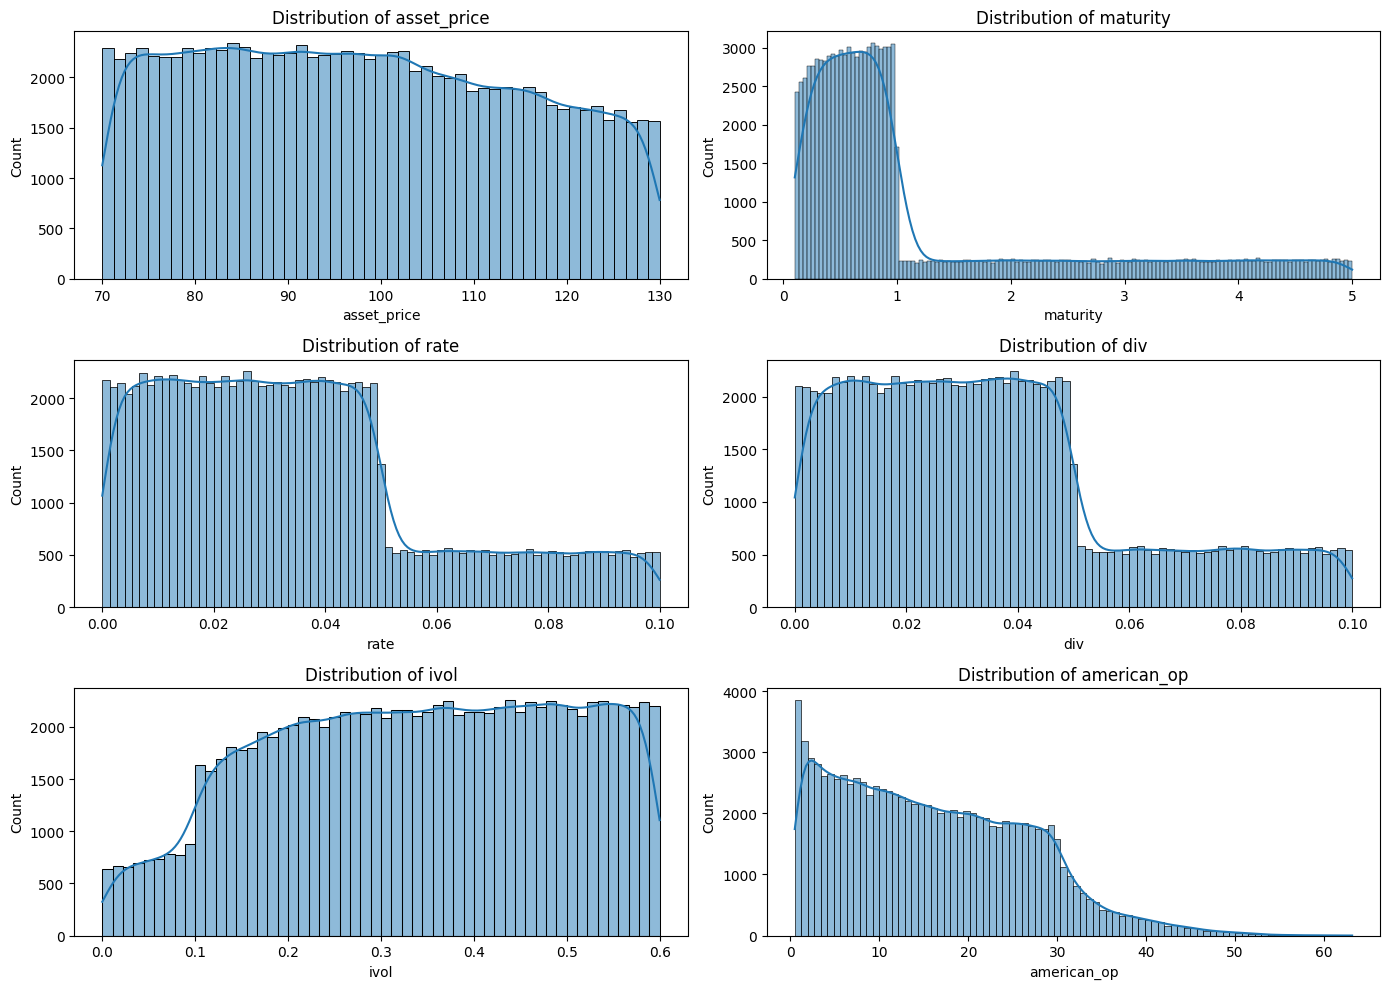

In [6]:
# Create histograms for all numerical features
plt.figure(figsize=(14, 10))

for i, column in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    
plt.show()

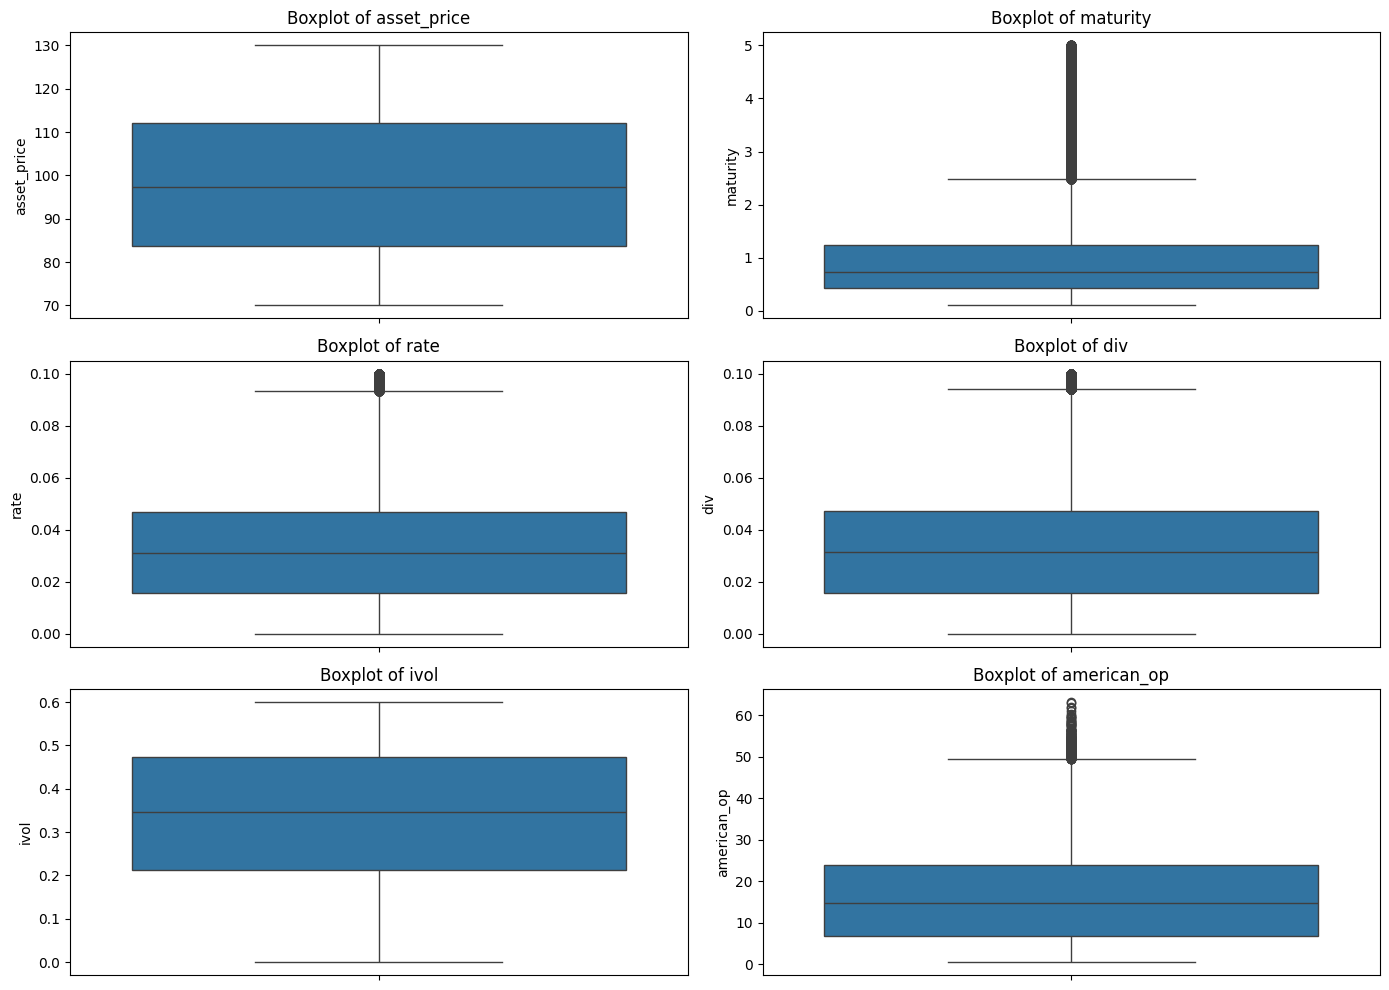

In [7]:
# Create boxplots for all numerical features
plt.figure(figsize=(14, 10))

for i, column in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    
plt.show()

## Correlation Analysis

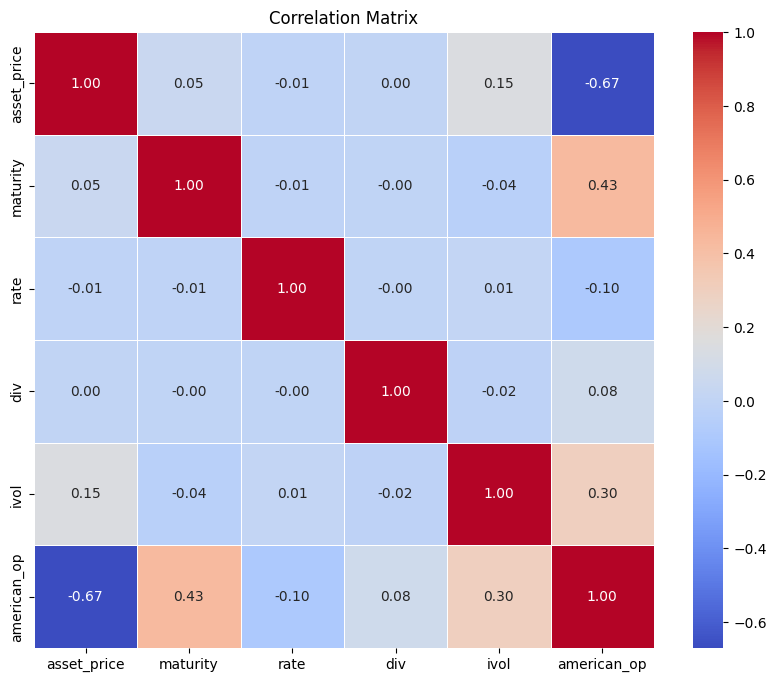


Correlations with american_op:
american_op    1.000000
maturity       0.427901
ivol           0.296504
div            0.078785
rate          -0.097986
asset_price   -0.670509
Name: american_op, dtype: float64


In [8]:
# Calculate and visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlations with american_op (target variable)
print("\nCorrelations with american_op:")
corr_with_target = corr_matrix['american_op'].sort_values(ascending=False)
print(corr_with_target)

## Feature Relationships with Target Variable

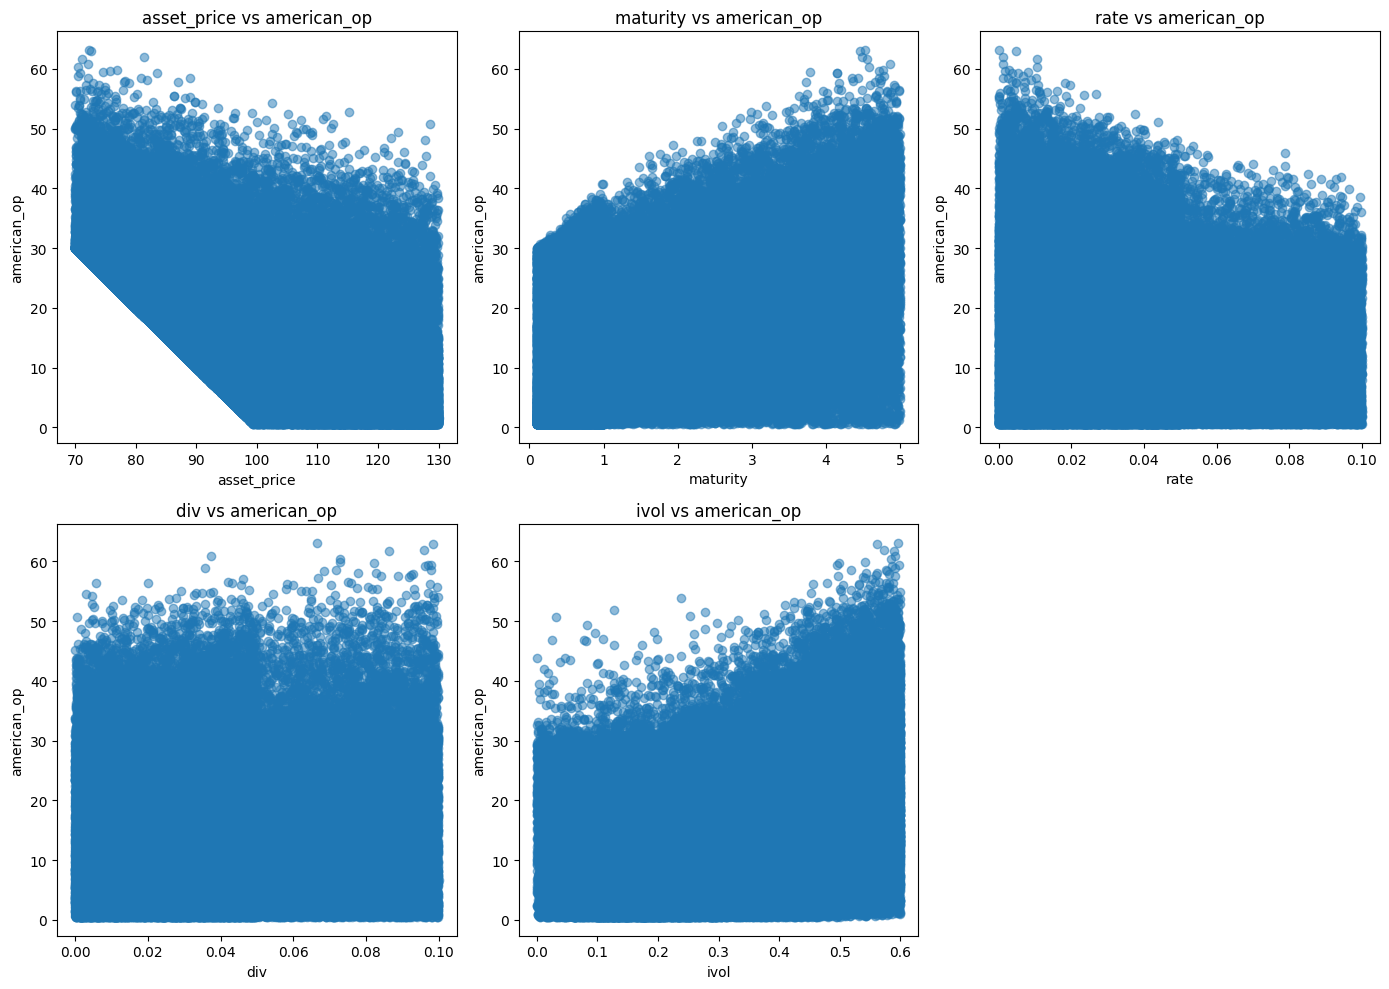

In [9]:
# Scatter plots of features vs target variable
plt.figure(figsize=(14, 10))

features = [col for col in df.columns if col != 'american_op']

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[feature], df['american_op'], alpha=0.5)
    plt.title(f'{feature} vs american_op')
    plt.xlabel(feature)
    plt.ylabel('american_op')
    plt.tight_layout()
    
plt.show()

## Outlier Analysis and Treatment

In [10]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for each feature
for column in df.columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    outlier_percentage = len(outliers) / len(df) * 100
    print(f"Feature: {column}")
    print(f"Number of outliers: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f"Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}\n")

Feature: asset_price
Number of outliers: 0 (0.00%)
Lower bound: 40.9701, Upper bound: 154.8462

Feature: maturity
Number of outliers: 16904 (16.83%)
Lower bound: -0.8110, Upper bound: 2.4814

Feature: rate
Number of outliers: 2600 (2.59%)
Lower bound: -0.0311, Upper bound: 0.0933

Feature: div
Number of outliers: 2495 (2.48%)
Lower bound: -0.0310, Upper bound: 0.0939

Feature: ivol
Number of outliers: 0 (0.00%)
Lower bound: -0.1770, Upper bound: 0.8641

Feature: american_op
Number of outliers: 281 (0.28%)
Lower bound: -18.6171, Upper bound: 49.4442



In [11]:
# Using modified Z-score method to detect outliers
def modified_z_score(df, column):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    return modified_z_scores
# Check outliers using modified Z-score
for column in df.columns:
    z_scores = modified_z_score(df, column)
    outliers = df[np.abs(z_scores) > 3.5]
    outlier_percentage = len(outliers) / len(df) * 100
    print(f"Feature: {column}")
    print(f"Number of outliers (modified Z-score): {len(outliers)} ({outlier_percentage:.2f}%)\n")

Feature: asset_price
Number of outliers (modified Z-score): 0 (0.00%)

Feature: maturity
Number of outliers (modified Z-score): 17618 (17.54%)

Feature: rate
Number of outliers (modified Z-score): 0 (0.00%)

Feature: div
Number of outliers (modified Z-score): 0 (0.00%)

Feature: ivol
Number of outliers (modified Z-score): 0 (0.00%)

Feature: american_op
Number of outliers (modified Z-score): 15 (0.01%)



**we can see that the 'maturity' column column has the most amount of outliers and they make up to 17% of the total number of data**

**Since in this case the outliers isn't indicated to be a form of measure error it's a valid measure and thus I will keep them in the data**

## Machine Learning Model Preparation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare the data for machine learning
X = df.drop('american_op', axis=1)
y = df['american_op']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Validation data shape: {X_validation.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Validation labels shape: {y_validation.shape}")


Training data shape: (80364, 5)
Testing data shape: (10045, 5)
Validation data shape: (10046, 5)
Training labels shape: (80364,)
Testing labels shape: (10045,)
Validation labels shape: (10046,)


# Models

In [13]:

def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

In [54]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import optuna

def objective_ridge(trial):
    params = {
        'alpha' : trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(**params))
    ])

    # Manual cross-validation loop to use custom metric
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    errors = []

    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline.fit(X_fold_train, y_fold_train)
        y_pred = pipeline.predict(X_fold_val)

        error = mean_relative_error(y_fold_val, y_pred)
        errors.append(error)

    print(f"Trial {trial.number}: {params} -> Mean Relative Error: {np.mean(errors)}")

    return np.mean(errors)  # lower is better

study = optuna.create_study(direction='minimize')
study.optimize(objective_ridge, n_trials=50, n_jobs=4)

print("Best params:", study.best_params)

[I 2025-06-18 14:28:27,682] A new study created in memory with name: no-name-0d39f6a9-3f64-4c5c-9661-d188e505fba8
[I 2025-06-18 14:28:27,999] Trial 1 finished with value: 0.4314018275003441 and parameters: {'alpha': 0.000103337222274179}. Best is trial 1 with value: 0.4314018275003441.
[I 2025-06-18 14:28:28,007] Trial 3 finished with value: 0.4314018185473521 and parameters: {'alpha': 0.0022607457564932285}. Best is trial 3 with value: 0.4314018185473521.
[I 2025-06-18 14:28:28,003] Trial 2 finished with value: 0.4314018264445346 and parameters: {'alpha': 0.00035775632920659914}. Best is trial 2 with value: 0.4314018264445346.
[I 2025-06-18 14:28:28,046] Trial 0 finished with value: 0.43140009022540765 and parameters: {'alpha': 0.4188364297900802}. Best is trial 0 with value: 0.43140009022540765.
[I 2025-06-18 14:28:28,179] Trial 5 finished with value: 0.43140182496823154 and parameters: {'alpha': 0.0007135020743681785}. Best is trial 0 with value: 0.43140009022540765.


Trial 1: {'alpha': 0.000103337222274179} -> Mean Relative Error: 0.4314018275003441
Trial 2: {'alpha': 0.00035775632920659914} -> Mean Relative Error: 0.4314018264445346
Trial 3: {'alpha': 0.0022607457564932285} -> Mean Relative Error: 0.4314018185473521
Trial 0: {'alpha': 0.4188364297900802} -> Mean Relative Error: 0.43140009022540765
Trial 5: {'alpha': 0.0007135020743681785} -> Mean Relative Error: 0.43140182496823154


[I 2025-06-18 14:28:28,214] Trial 4 finished with value: 0.43140182683854034 and parameters: {'alpha': 0.00026281252751690957}. Best is trial 0 with value: 0.43140009022540765.
[I 2025-06-18 14:28:28,273] Trial 6 finished with value: 0.431401768754785 and parameters: {'alpha': 0.014259298915322237}. Best is trial 0 with value: 0.43140009022540765.
[I 2025-06-18 14:28:28,291] Trial 7 finished with value: 0.4314018270338846 and parameters: {'alpha': 0.00021574028595922027}. Best is trial 0 with value: 0.43140009022540765.


Trial 4: {'alpha': 0.00026281252751690957} -> Mean Relative Error: 0.43140182683854034
Trial 6: {'alpha': 0.014259298915322237} -> Mean Relative Error: 0.431401768754785
Trial 7: {'alpha': 0.00021574028595922027} -> Mean Relative Error: 0.4314018270338846


[I 2025-06-18 14:28:28,422] Trial 9 finished with value: 0.43140141491187284 and parameters: {'alpha': 0.09952531902707606}. Best is trial 0 with value: 0.43140009022540765.
[I 2025-06-18 14:28:28,473] Trial 8 finished with value: 0.4314017849597077 and parameters: {'alpha': 0.010354385392701528}. Best is trial 0 with value: 0.43140009022540765.
[I 2025-06-18 14:28:28,519] Trial 10 finished with value: 0.43139950541009886 and parameters: {'alpha': 0.5598136304507829}. Best is trial 10 with value: 0.43139950541009886.
[I 2025-06-18 14:28:28,548] Trial 11 finished with value: 0.4314018021494426 and parameters: {'alpha': 0.0062121617645211425}. Best is trial 10 with value: 0.43139950541009886.


Trial 9: {'alpha': 0.09952531902707606} -> Mean Relative Error: 0.43140141491187284
Trial 8: {'alpha': 0.010354385392701528} -> Mean Relative Error: 0.4314017849597077
Trial 10: {'alpha': 0.5598136304507829} -> Mean Relative Error: 0.43139950541009886
Trial 11: {'alpha': 0.0062121617645211425} -> Mean Relative Error: 0.4314018021494426


[I 2025-06-18 14:28:28,661] Trial 12 finished with value: 0.43135640554906973 and parameters: {'alpha': 11.04010770346246}. Best is trial 12 with value: 0.43135640554906973.
[I 2025-06-18 14:28:28,730] Trial 13 finished with value: 0.4313052524375989 and parameters: {'alpha': 23.673746111010107}. Best is trial 13 with value: 0.4313052524375989.
[I 2025-06-18 14:28:28,747] Trial 15 finished with value: 0.43136171647708765 and parameters: {'alpha': 9.740430731315513}. Best is trial 13 with value: 0.4313052524375989.
[I 2025-06-18 14:28:28,774] Trial 14 finished with value: 0.43132109841673766 and parameters: {'alpha': 19.724684629684823}. Best is trial 13 with value: 0.4313052524375989.
[I 2025-06-18 14:28:28,826] Trial 16 finished with value: 0.4312241202983594 and parameters: {'alpha': 44.35197794221865}. Best is trial 16 with value: 0.4312241202983594.
[I 2025-06-18 14:28:28,858] Trial 17 finished with value: 0.43124381124719413 and parameters: {'alpha': 39.25369536449318}. Best is tr

Trial 12: {'alpha': 11.04010770346246} -> Mean Relative Error: 0.43135640554906973
Trial 13: {'alpha': 23.673746111010107} -> Mean Relative Error: 0.4313052524375989
Trial 15: {'alpha': 9.740430731315513} -> Mean Relative Error: 0.43136171647708765
Trial 14: {'alpha': 19.724684629684823} -> Mean Relative Error: 0.43132109841673766
Trial 16: {'alpha': 44.35197794221865} -> Mean Relative Error: 0.4312241202983594
Trial 17: {'alpha': 39.25369536449318} -> Mean Relative Error: 0.43124381124719413


[I 2025-06-18 14:28:28,884] Trial 18 finished with value: 0.43107904222444543 and parameters: {'alpha': 83.5104765922863}. Best is trial 18 with value: 0.43107904222444543.
[I 2025-06-18 14:28:28,892] Trial 19 finished with value: 0.4311505997681697 and parameters: {'alpha': 63.90322977566515}. Best is trial 18 with value: 0.43107904222444543.
[I 2025-06-18 14:28:28,992] Trial 20 finished with value: 0.43117399622751384 and parameters: {'alpha': 57.60762507718022}. Best is trial 18 with value: 0.43107904222444543.
[I 2025-06-18 14:28:29,010] Trial 22 finished with value: 0.43103673686140787 and parameters: {'alpha': 95.2759055925123}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,017] Trial 21 finished with value: 0.43139209965442354 and parameters: {'alpha': 2.3501764923385036}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,065] Trial 23 finished with value: 0.43138939582676045 and parameters: {'alpha': 3.0048682059480813}. Best is

Trial 18: {'alpha': 83.5104765922863} -> Mean Relative Error: 0.43107904222444543
Trial 19: {'alpha': 63.90322977566515} -> Mean Relative Error: 0.4311505997681697
Trial 20: {'alpha': 57.60762507718022} -> Mean Relative Error: 0.43117399622751384
Trial 22: {'alpha': 95.2759055925123} -> Mean Relative Error: 0.43103673686140787
Trial 21: {'alpha': 2.3501764923385036} -> Mean Relative Error: 0.43139209965442354
Trial 23: {'alpha': 3.0048682059480813} -> Mean Relative Error: 0.43138939582676045


[I 2025-06-18 14:28:29,200] Trial 25 finished with value: 0.4313877723795807 and parameters: {'alpha': 3.3980163760430773}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,204] Trial 24 finished with value: 0.4313795905053427 and parameters: {'alpha': 5.384474655620788}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,223] Trial 26 finished with value: 0.43138788997413297 and parameters: {'alpha': 3.369506424842119}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,319] Trial 27 finished with value: 0.43138916268326455 and parameters: {'alpha': 3.0613215141403374}. Best is trial 22 with value: 0.43103673686140787.


Trial 25: {'alpha': 3.3980163760430773} -> Mean Relative Error: 0.4313877723795807
Trial 24: {'alpha': 5.384474655620788} -> Mean Relative Error: 0.4313795905053427
Trial 26: {'alpha': 3.369506424842119} -> Mean Relative Error: 0.43138788997413297
Trial 27: {'alpha': 3.0613215141403374} -> Mean Relative Error: 0.43138916268326455


[I 2025-06-18 14:28:29,455] Trial 29 finished with value: 0.4310831479212449 and parameters: {'alpha': 82.37516340630408}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,490] Trial 28 finished with value: 0.4311558170060943 and parameters: {'alpha': 62.49284719580505}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,505] Trial 30 finished with value: 0.43120362827571 and parameters: {'alpha': 49.73459341772111}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,576] Trial 31 finished with value: 0.43105012685579425 and parameters: {'alpha': 91.5319061429626}. Best is trial 22 with value: 0.43103673686140787.


Trial 29: {'alpha': 82.37516340630408} -> Mean Relative Error: 0.4310831479212449
Trial 28: {'alpha': 62.49284719580505} -> Mean Relative Error: 0.4311558170060943
Trial 30: {'alpha': 49.73459341772111} -> Mean Relative Error: 0.43120362827571
Trial 31: {'alpha': 91.5319061429626} -> Mean Relative Error: 0.43105012685579425


[I 2025-06-18 14:28:29,725] Trial 32 finished with value: 0.43139871451379636 and parameters: {'alpha': 0.7504830552659106}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,791] Trial 34 finished with value: 0.431397536003868 and parameters: {'alpha': 1.0346020513081717}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,813] Trial 33 finished with value: 0.43140013076620265 and parameters: {'alpha': 0.4090636309937964}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:29,833] Trial 35 finished with value: 0.4310554096000776 and parameters: {'alpha': 90.06166650985058}. Best is trial 22 with value: 0.43103673686140787.


Trial 32: {'alpha': 0.7504830552659106} -> Mean Relative Error: 0.43139871451379636
Trial 34: {'alpha': 1.0346020513081717} -> Mean Relative Error: 0.431397536003868
Trial 33: {'alpha': 0.4090636309937964} -> Mean Relative Error: 0.43140013076620265
Trial 35: {'alpha': 90.06166650985058} -> Mean Relative Error: 0.4310554096000776


[I 2025-06-18 14:28:30,001] Trial 36 finished with value: 0.43106875090010055 and parameters: {'alpha': 86.35917630758433}. Best is trial 22 with value: 0.43103673686140787.
[I 2025-06-18 14:28:30,039] Trial 37 finished with value: 0.4310287494972188 and parameters: {'alpha': 97.51325086254347}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,130] Trial 38 finished with value: 0.4310335592378107 and parameters: {'alpha': 96.16546305216293}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,137] Trial 39 finished with value: 0.43132666756105864 and parameters: {'alpha': 18.34149776750626}. Best is trial 37 with value: 0.4310287494972188.


Trial 36: {'alpha': 86.35917630758433} -> Mean Relative Error: 0.43106875090010055
Trial 37: {'alpha': 97.51325086254347} -> Mean Relative Error: 0.4310287494972188
Trial 38: {'alpha': 96.16546305216293} -> Mean Relative Error: 0.4310335592378107
Trial 39: {'alpha': 18.34149776750626} -> Mean Relative Error: 0.43132666756105864


[I 2025-06-18 14:28:30,268] Trial 40 finished with value: 0.43132664575365276 and parameters: {'alpha': 18.346901295661876}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,377] Trial 41 finished with value: 0.4313256853498372 and parameters: {'alpha': 18.58495010764076}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,431] Trial 42 finished with value: 0.43134564018347205 and parameters: {'alpha': 13.676230709885424}. Best is trial 37 with value: 0.4310287494972188.


Trial 40: {'alpha': 18.346901295661876} -> Mean Relative Error: 0.43132664575365276
Trial 41: {'alpha': 18.58495010764076} -> Mean Relative Error: 0.4313256853498372
Trial 42: {'alpha': 13.676230709885424} -> Mean Relative Error: 0.43134564018347205


[I 2025-06-18 14:28:30,495] Trial 43 finished with value: 0.43136302272156923 and parameters: {'alpha': 9.4209261023875}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,547] Trial 44 finished with value: 0.43136716679085896 and parameters: {'alpha': 8.410220909170635}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,661] Trial 46 finished with value: 0.4314015863225624 and parameters: {'alpha': 0.058220197498636966}. Best is trial 37 with value: 0.4310287494972188.


Trial 43: {'alpha': 9.4209261023875} -> Mean Relative Error: 0.43136302272156923
Trial 44: {'alpha': 8.410220909170635} -> Mean Relative Error: 0.43136716679085896
Trial 46: {'alpha': 0.058220197498636966} -> Mean Relative Error: 0.4314015863225624


[I 2025-06-18 14:28:30,702] Trial 45 finished with value: 0.4313623041623347 and parameters: {'alpha': 9.596630088602536}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,791] Trial 47 finished with value: 0.43105736095477165 and parameters: {'alpha': 89.51908180271829}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,805] Trial 48 finished with value: 0.43127369826486506 and parameters: {'alpha': 31.61805128480001}. Best is trial 37 with value: 0.4310287494972188.
[I 2025-06-18 14:28:30,823] Trial 49 finished with value: 0.4312684917338869 and parameters: {'alpha': 32.94030735990675}. Best is trial 37 with value: 0.4310287494972188.


Trial 45: {'alpha': 9.596630088602536} -> Mean Relative Error: 0.4313623041623347
Trial 47: {'alpha': 89.51908180271829} -> Mean Relative Error: 0.43105736095477165
Trial 48: {'alpha': 31.61805128480001} -> Mean Relative Error: 0.43127369826486506
Trial 49: {'alpha': 32.94030735990675} -> Mean Relative Error: 0.4312684917338869
Best params: {'alpha': 97.51325086254347}


In [55]:
model_svr = Ridge(**study.best_params)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', model_svr)
])
pipeline.fit(X_train, y_train)
# test the model
y_pred = pipeline.predict(X_test)
print("Mean Relative Error on Test Set:", mean_relative_error(y_test, y_pred))

Mean Relative Error on Test Set: 0.42087284869647335


*We can see a high MRE then we try another better model (previous one was linear model)*

In [16]:
import xgboost as xgb

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 8),  # Deeper trees for non-linearity
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),  # Regularization
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1e1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 1e1, log=True)
    }
    
    model = xgb.XGBRegressor(
        **params,
        objective='reg:squarederror',
        tree_method='hist',  # Use histogram method for speed
        n_jobs=-1
    )
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', model)])

    # Manual cross-validation loop to use custom metric
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    errors = []

    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline.fit(X_fold_train, y_fold_train)
        y_pred = pipeline.predict(X_fold_val)

        error = mean_relative_error(y_fold_val, y_pred)
        errors.append(error)

    print(f"Trial {trial.number}: {params} -> Mean Relative Error: {np.mean(errors)}")

    return np.mean(errors)  # lower is better

study = optuna.create_study(direction='minimize')
study.optimize(objective_xgb, n_trials=50, n_jobs=4)

print("Best params:", study.best_params)

[I 2025-06-17 20:33:36,442] A new study created in memory with name: no-name-0dcc19b2-ee48-46c6-b67b-8776b5e203ba
[I 2025-06-17 20:33:45,401] Trial 2 finished with value: 0.0668499558423068 and parameters: {'n_estimators': 442, 'max_depth': 4, 'learning_rate': 0.22375051545402372, 'subsample': 0.8285433983430306, 'colsample_bytree': 0.7639915913752473, 'gamma': 1.4037784334911145, 'reg_alpha': 3.372682996967398, 'reg_lambda': 0.0001868717421224549}. Best is trial 2 with value: 0.0668499558423068.


Trial 2: {'n_estimators': 442, 'max_depth': 4, 'learning_rate': 0.22375051545402372, 'subsample': 0.8285433983430306, 'colsample_bytree': 0.7639915913752473, 'gamma': 1.4037784334911145, 'reg_alpha': 3.372682996967398, 'reg_lambda': 0.0001868717421224549} -> Mean Relative Error: 0.0668499558423068


[I 2025-06-17 20:33:48,275] Trial 3 finished with value: 0.06602194382710264 and parameters: {'n_estimators': 562, 'max_depth': 4, 'learning_rate': 0.033238770183401725, 'subsample': 0.6283000113478776, 'colsample_bytree': 0.638465682377189, 'gamma': 4.112090031228771, 'reg_alpha': 0.08101110683611396, 'reg_lambda': 0.0015196470601781195}. Best is trial 3 with value: 0.06602194382710264.


Trial 3: {'n_estimators': 562, 'max_depth': 4, 'learning_rate': 0.033238770183401725, 'subsample': 0.6283000113478776, 'colsample_bytree': 0.638465682377189, 'gamma': 4.112090031228771, 'reg_alpha': 0.08101110683611396, 'reg_lambda': 0.0015196470601781195} -> Mean Relative Error: 0.06602194382710264


[I 2025-06-17 20:33:49,238] Trial 0 finished with value: 0.05157362697951237 and parameters: {'n_estimators': 715, 'max_depth': 4, 'learning_rate': 0.04580870376215874, 'subsample': 0.6629058709537788, 'colsample_bytree': 0.9106794967229505, 'gamma': 1.4898538965472308, 'reg_alpha': 0.034310709063763774, 'reg_lambda': 4.022104127018827}. Best is trial 0 with value: 0.05157362697951237.


Trial 0: {'n_estimators': 715, 'max_depth': 4, 'learning_rate': 0.04580870376215874, 'subsample': 0.6629058709537788, 'colsample_bytree': 0.9106794967229505, 'gamma': 1.4898538965472308, 'reg_alpha': 0.034310709063763774, 'reg_lambda': 4.022104127018827} -> Mean Relative Error: 0.05157362697951237


[I 2025-06-17 20:33:53,384] Trial 4 finished with value: 0.05395141465707855 and parameters: {'n_estimators': 836, 'max_depth': 5, 'learning_rate': 0.1279524343578311, 'subsample': 0.90897547806685, 'colsample_bytree': 0.9815825225510908, 'gamma': 1.6157081229612285, 'reg_alpha': 0.0004740359952909425, 'reg_lambda': 0.0936314496380099}. Best is trial 0 with value: 0.05157362697951237.


Trial 4: {'n_estimators': 836, 'max_depth': 5, 'learning_rate': 0.1279524343578311, 'subsample': 0.90897547806685, 'colsample_bytree': 0.9815825225510908, 'gamma': 1.6157081229612285, 'reg_alpha': 0.0004740359952909425, 'reg_lambda': 0.0936314496380099} -> Mean Relative Error: 0.05395141465707855


[I 2025-06-17 20:33:54,267] Trial 6 finished with value: 0.09953390167904708 and parameters: {'n_estimators': 290, 'max_depth': 3, 'learning_rate': 0.03398172598990776, 'subsample': 0.7752830846387383, 'colsample_bytree': 0.8691867690980777, 'gamma': 3.490175626520246, 'reg_alpha': 0.0016101557341145058, 'reg_lambda': 0.00047826441093852035}. Best is trial 0 with value: 0.05157362697951237.


Trial 6: {'n_estimators': 290, 'max_depth': 3, 'learning_rate': 0.03398172598990776, 'subsample': 0.7752830846387383, 'colsample_bytree': 0.8691867690980777, 'gamma': 3.490175626520246, 'reg_alpha': 0.0016101557341145058, 'reg_lambda': 0.00047826441093852035} -> Mean Relative Error: 0.09953390167904708


[I 2025-06-17 20:33:58,172] Trial 5 finished with value: 0.06105907652062151 and parameters: {'n_estimators': 966, 'max_depth': 7, 'learning_rate': 0.18173601688065288, 'subsample': 0.9831623260231417, 'colsample_bytree': 0.6020934085247042, 'gamma': 2.4129113673623053, 'reg_alpha': 0.00028808712394189263, 'reg_lambda': 0.02202999385302632}. Best is trial 0 with value: 0.05157362697951237.


Trial 5: {'n_estimators': 966, 'max_depth': 7, 'learning_rate': 0.18173601688065288, 'subsample': 0.9831623260231417, 'colsample_bytree': 0.6020934085247042, 'gamma': 2.4129113673623053, 'reg_alpha': 0.00028808712394189263, 'reg_lambda': 0.02202999385302632} -> Mean Relative Error: 0.06105907652062151


[I 2025-06-17 20:34:14,648] Trial 8 finished with value: 0.05462864382748703 and parameters: {'n_estimators': 630, 'max_depth': 4, 'learning_rate': 0.05361504648026522, 'subsample': 0.9197116760486744, 'colsample_bytree': 0.9492635728320182, 'gamma': 1.8181627420441793, 'reg_alpha': 0.0019968159486539456, 'reg_lambda': 0.3599185293274995}. Best is trial 0 with value: 0.05157362697951237.


Trial 8: {'n_estimators': 630, 'max_depth': 4, 'learning_rate': 0.05361504648026522, 'subsample': 0.9197116760486744, 'colsample_bytree': 0.9492635728320182, 'gamma': 1.8181627420441793, 'reg_alpha': 0.0019968159486539456, 'reg_lambda': 0.3599185293274995} -> Mean Relative Error: 0.05462864382748703


[I 2025-06-17 20:34:38,278] Trial 9 finished with value: 0.07234717558070307 and parameters: {'n_estimators': 477, 'max_depth': 4, 'learning_rate': 0.12187348944172573, 'subsample': 0.9995675445568861, 'colsample_bytree': 0.6129110217787136, 'gamma': 2.9002653345627136, 'reg_alpha': 0.0005853862344028359, 'reg_lambda': 2.3230244137304488}. Best is trial 0 with value: 0.05157362697951237.


Trial 9: {'n_estimators': 477, 'max_depth': 4, 'learning_rate': 0.12187348944172573, 'subsample': 0.9995675445568861, 'colsample_bytree': 0.6129110217787136, 'gamma': 2.9002653345627136, 'reg_alpha': 0.0005853862344028359, 'reg_lambda': 2.3230244137304488} -> Mean Relative Error: 0.07234717558070307


[I 2025-06-17 20:34:57,339] Trial 10 finished with value: 0.06676561200376946 and parameters: {'n_estimators': 634, 'max_depth': 8, 'learning_rate': 0.1075738637897836, 'subsample': 0.8891038909088929, 'colsample_bytree': 0.6799172800535783, 'gamma': 1.96738393218988, 'reg_alpha': 0.7665071982129477, 'reg_lambda': 0.0510097056266545}. Best is trial 0 with value: 0.05157362697951237.


Trial 10: {'n_estimators': 634, 'max_depth': 8, 'learning_rate': 0.1075738637897836, 'subsample': 0.8891038909088929, 'colsample_bytree': 0.6799172800535783, 'gamma': 1.96738393218988, 'reg_alpha': 0.7665071982129477, 'reg_lambda': 0.0510097056266545} -> Mean Relative Error: 0.06676561200376946


[I 2025-06-17 20:35:18,819] Trial 12 finished with value: 0.2567470777518496 and parameters: {'n_estimators': 402, 'max_depth': 4, 'learning_rate': 0.011391552815629856, 'subsample': 0.7480976707246327, 'colsample_bytree': 0.7684283522065117, 'gamma': 1.1812732748652714, 'reg_alpha': 0.0119357262139837, 'reg_lambda': 1.5001963049171905}. Best is trial 0 with value: 0.05157362697951237.


Trial 12: {'n_estimators': 402, 'max_depth': 4, 'learning_rate': 0.011391552815629856, 'subsample': 0.7480976707246327, 'colsample_bytree': 0.7684283522065117, 'gamma': 1.1812732748652714, 'reg_alpha': 0.0119357262139837, 'reg_lambda': 1.5001963049171905} -> Mean Relative Error: 0.2567470777518496


[I 2025-06-17 20:35:29,540] Trial 1 finished with value: 0.039078643551963804 and parameters: {'n_estimators': 645, 'max_depth': 6, 'learning_rate': 0.020375757151703592, 'subsample': 0.9253279767352681, 'colsample_bytree': 0.946366910193718, 'gamma': 2.426836215625655, 'reg_alpha': 0.2937419121635095, 'reg_lambda': 0.003408170610873604}. Best is trial 1 with value: 0.039078643551963804.


Trial 1: {'n_estimators': 645, 'max_depth': 6, 'learning_rate': 0.020375757151703592, 'subsample': 0.9253279767352681, 'colsample_bytree': 0.946366910193718, 'gamma': 2.426836215625655, 'reg_alpha': 0.2937419121635095, 'reg_lambda': 0.003408170610873604} -> Mean Relative Error: 0.039078643551963804


[I 2025-06-17 20:36:02,375] Trial 13 finished with value: 0.03795579392401009 and parameters: {'n_estimators': 790, 'max_depth': 6, 'learning_rate': 0.01409612923843607, 'subsample': 0.6042672640612519, 'colsample_bytree': 0.880620673062346, 'gamma': 0.11938623158875439, 'reg_alpha': 0.09660165702081018, 'reg_lambda': 9.984581276998947}. Best is trial 13 with value: 0.03795579392401009.


Trial 13: {'n_estimators': 790, 'max_depth': 6, 'learning_rate': 0.01409612923843607, 'subsample': 0.6042672640612519, 'colsample_bytree': 0.880620673062346, 'gamma': 0.11938623158875439, 'reg_alpha': 0.09660165702081018, 'reg_lambda': 9.984581276998947} -> Mean Relative Error: 0.03795579392401009


[I 2025-06-17 20:36:46,521] Trial 15 finished with value: 0.036405910972051536 and parameters: {'n_estimators': 807, 'max_depth': 6, 'learning_rate': 0.012727134509179831, 'subsample': 0.7000004194708628, 'colsample_bytree': 0.8473695438285169, 'gamma': 0.04077335887398863, 'reg_alpha': 0.39454484754030866, 'reg_lambda': 0.005340442030881511}. Best is trial 15 with value: 0.036405910972051536.


Trial 15: {'n_estimators': 807, 'max_depth': 6, 'learning_rate': 0.012727134509179831, 'subsample': 0.7000004194708628, 'colsample_bytree': 0.8473695438285169, 'gamma': 0.04077335887398863, 'reg_alpha': 0.39454484754030866, 'reg_lambda': 0.005340442030881511} -> Mean Relative Error: 0.036405910972051536


[I 2025-06-17 20:37:23,390] Trial 16 finished with value: 0.041438522707156714 and parameters: {'n_estimators': 826, 'max_depth': 6, 'learning_rate': 0.01039954897644366, 'subsample': 0.695823104776334, 'colsample_bytree': 0.8414338344405288, 'gamma': 0.110824525766417, 'reg_alpha': 6.903946405922279, 'reg_lambda': 0.008403351476946574}. Best is trial 15 with value: 0.036405910972051536.


Trial 16: {'n_estimators': 826, 'max_depth': 6, 'learning_rate': 0.01039954897644366, 'subsample': 0.695823104776334, 'colsample_bytree': 0.8414338344405288, 'gamma': 0.110824525766417, 'reg_alpha': 6.903946405922279, 'reg_lambda': 0.008403351476946574} -> Mean Relative Error: 0.041438522707156714


[I 2025-06-17 20:37:48,678] Trial 11 finished with value: 0.03245256804117318 and parameters: {'n_estimators': 987, 'max_depth': 7, 'learning_rate': 0.013803544564778074, 'subsample': 0.8410536716287497, 'colsample_bytree': 0.8751771163444744, 'gamma': 0.04779743277798898, 'reg_alpha': 0.8308629956135741, 'reg_lambda': 0.0025650414891188163}. Best is trial 11 with value: 0.03245256804117318.


Trial 11: {'n_estimators': 987, 'max_depth': 7, 'learning_rate': 0.013803544564778074, 'subsample': 0.8410536716287497, 'colsample_bytree': 0.8751771163444744, 'gamma': 0.04779743277798898, 'reg_alpha': 0.8308629956135741, 'reg_lambda': 0.0025650414891188163} -> Mean Relative Error: 0.03245256804117318


[I 2025-06-17 20:37:57,328] Trial 7 finished with value: 0.05192118964288041 and parameters: {'n_estimators': 502, 'max_depth': 6, 'learning_rate': 0.01323045408574911, 'subsample': 0.804210232699929, 'colsample_bytree': 0.9096118239376929, 'gamma': 3.7471450352878755, 'reg_alpha': 0.0005371364677706422, 'reg_lambda': 1.8225286314420295}. Best is trial 11 with value: 0.03245256804117318.


Trial 7: {'n_estimators': 502, 'max_depth': 6, 'learning_rate': 0.01323045408574911, 'subsample': 0.804210232699929, 'colsample_bytree': 0.9096118239376929, 'gamma': 3.7471450352878755, 'reg_alpha': 0.0005371364677706422, 'reg_lambda': 1.8225286314420295} -> Mean Relative Error: 0.05192118964288041


[I 2025-06-17 20:40:18,016] Trial 17 finished with value: 0.02894788128217178 and parameters: {'n_estimators': 975, 'max_depth': 7, 'learning_rate': 0.018179676001914204, 'subsample': 0.6016473791529032, 'colsample_bytree': 0.8226817475114728, 'gamma': 0.047039573896635045, 'reg_alpha': 0.33259653853976745, 'reg_lambda': 0.2789298159677029}. Best is trial 17 with value: 0.02894788128217178.


Trial 17: {'n_estimators': 975, 'max_depth': 7, 'learning_rate': 0.018179676001914204, 'subsample': 0.6016473791529032, 'colsample_bytree': 0.8226817475114728, 'gamma': 0.047039573896635045, 'reg_alpha': 0.33259653853976745, 'reg_lambda': 0.2789298159677029} -> Mean Relative Error: 0.02894788128217178


[I 2025-06-17 20:40:18,690] Trial 18 finished with value: 0.036615392625897976 and parameters: {'n_estimators': 953, 'max_depth': 8, 'learning_rate': 0.019942622823333953, 'subsample': 0.8409542206906679, 'colsample_bytree': 0.812423984238314, 'gamma': 0.6775223891097802, 'reg_alpha': 0.9703377017280687, 'reg_lambda': 0.001269705787539411}. Best is trial 17 with value: 0.02894788128217178.


Trial 18: {'n_estimators': 953, 'max_depth': 8, 'learning_rate': 0.019942622823333953, 'subsample': 0.8409542206906679, 'colsample_bytree': 0.812423984238314, 'gamma': 0.6775223891097802, 'reg_alpha': 0.9703377017280687, 'reg_lambda': 0.001269705787539411} -> Mean Relative Error: 0.036615392625897976


[I 2025-06-17 20:42:01,664] Trial 21 finished with value: 0.05265185880810783 and parameters: {'n_estimators': 998, 'max_depth': 7, 'learning_rate': 0.021002615700553437, 'subsample': 0.738293741307648, 'colsample_bytree': 0.7402420029993847, 'gamma': 4.755004541335958, 'reg_alpha': 2.0012433130574316, 'reg_lambda': 0.21889588163433643}. Best is trial 17 with value: 0.02894788128217178.


Trial 21: {'n_estimators': 998, 'max_depth': 7, 'learning_rate': 0.021002615700553437, 'subsample': 0.738293741307648, 'colsample_bytree': 0.7402420029993847, 'gamma': 4.755004541335958, 'reg_alpha': 2.0012433130574316, 'reg_lambda': 0.21889588163433643} -> Mean Relative Error: 0.05265185880810783


[I 2025-06-17 20:42:28,056] Trial 22 finished with value: 0.051531836580253884 and parameters: {'n_estimators': 869, 'max_depth': 7, 'learning_rate': 0.08038680414149142, 'subsample': 0.8700020481913786, 'colsample_bytree': 0.7157620168061406, 'gamma': 0.7905238309828844, 'reg_alpha': 0.009153246017686849, 'reg_lambda': 0.019360955332947558}. Best is trial 17 with value: 0.02894788128217178.


Trial 22: {'n_estimators': 869, 'max_depth': 7, 'learning_rate': 0.08038680414149142, 'subsample': 0.8700020481913786, 'colsample_bytree': 0.7157620168061406, 'gamma': 0.7905238309828844, 'reg_alpha': 0.009153246017686849, 'reg_lambda': 0.019360955332947558} -> Mean Relative Error: 0.051531836580253884


[I 2025-06-17 20:43:00,095] Trial 20 finished with value: 0.03696975363687307 and parameters: {'n_estimators': 994, 'max_depth': 8, 'learning_rate': 0.021516977156508778, 'subsample': 0.832788615560942, 'colsample_bytree': 0.8002854688584278, 'gamma': 0.720654998411239, 'reg_alpha': 1.6193234043883715, 'reg_lambda': 0.2418490858558121}. Best is trial 17 with value: 0.02894788128217178.


Trial 20: {'n_estimators': 994, 'max_depth': 8, 'learning_rate': 0.021516977156508778, 'subsample': 0.832788615560942, 'colsample_bytree': 0.8002854688584278, 'gamma': 0.720654998411239, 'reg_alpha': 1.6193234043883715, 'reg_lambda': 0.2418490858558121} -> Mean Relative Error: 0.03696975363687307


[I 2025-06-17 20:43:32,165] Trial 23 finished with value: 0.05689207022712274 and parameters: {'n_estimators': 907, 'max_depth': 8, 'learning_rate': 0.030537155874313677, 'subsample': 0.7704267586448063, 'colsample_bytree': 0.7960477298670806, 'gamma': 0.6631326258448541, 'reg_alpha': 0.2010674821099855, 'reg_lambda': 0.498607597707375}. Best is trial 17 with value: 0.02894788128217178.


Trial 23: {'n_estimators': 907, 'max_depth': 8, 'learning_rate': 0.030537155874313677, 'subsample': 0.7704267586448063, 'colsample_bytree': 0.7960477298670806, 'gamma': 0.6631326258448541, 'reg_alpha': 0.2010674821099855, 'reg_lambda': 0.498607597707375} -> Mean Relative Error: 0.05689207022712274


[I 2025-06-17 20:43:47,336] Trial 19 finished with value: 0.036150281565912545 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.02186218397938367, 'subsample': 0.7227787114467378, 'colsample_bytree': 0.8093785856241931, 'gamma': 0.7772310417441121, 'reg_alpha': 1.0924506095765574, 'reg_lambda': 0.0010621423408808245}. Best is trial 17 with value: 0.02894788128217178.


Trial 19: {'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.02186218397938367, 'subsample': 0.7227787114467378, 'colsample_bytree': 0.8093785856241931, 'gamma': 0.7772310417441121, 'reg_alpha': 1.0924506095765574, 'reg_lambda': 0.0010621423408808245} -> Mean Relative Error: 0.036150281565912545


[I 2025-06-17 20:46:39,800] Trial 25 finished with value: 0.03174593347380686 and parameters: {'n_estimators': 754, 'max_depth': 7, 'learning_rate': 0.015996623228430727, 'subsample': 0.6683622168940248, 'colsample_bytree': 0.8383179442567628, 'gamma': 0.14985745569873302, 'reg_alpha': 0.4012734474939306, 'reg_lambda': 0.009005022157623645}. Best is trial 17 with value: 0.02894788128217178.


Trial 25: {'n_estimators': 754, 'max_depth': 7, 'learning_rate': 0.015996623228430727, 'subsample': 0.6683622168940248, 'colsample_bytree': 0.8383179442567628, 'gamma': 0.14985745569873302, 'reg_alpha': 0.4012734474939306, 'reg_lambda': 0.009005022157623645} -> Mean Relative Error: 0.03174593347380686


[I 2025-06-17 20:46:44,631] Trial 24 finished with value: 0.028894207310136897 and parameters: {'n_estimators': 891, 'max_depth': 7, 'learning_rate': 0.030267408829608676, 'subsample': 0.6894441319406317, 'colsample_bytree': 0.8327795495741424, 'gamma': 0.08453454791221958, 'reg_alpha': 0.40645360107966444, 'reg_lambda': 0.006445618774930366}. Best is trial 24 with value: 0.028894207310136897.


Trial 24: {'n_estimators': 891, 'max_depth': 7, 'learning_rate': 0.030267408829608676, 'subsample': 0.6894441319406317, 'colsample_bytree': 0.8327795495741424, 'gamma': 0.08453454791221958, 'reg_alpha': 0.40645360107966444, 'reg_lambda': 0.006445618774930366} -> Mean Relative Error: 0.028894207310136897


[I 2025-06-17 20:46:45,263] Trial 14 finished with value: 0.03520918543148403 and parameters: {'n_estimators': 780, 'max_depth': 6, 'learning_rate': 0.014657492254086163, 'subsample': 0.6363822183104114, 'colsample_bytree': 0.8963613620231876, 'gamma': 0.029263042926952476, 'reg_alpha': 0.12336765465938912, 'reg_lambda': 0.005586139911683476}. Best is trial 24 with value: 0.028894207310136897.


Trial 14: {'n_estimators': 780, 'max_depth': 6, 'learning_rate': 0.014657492254086163, 'subsample': 0.6363822183104114, 'colsample_bytree': 0.8963613620231876, 'gamma': 0.029263042926952476, 'reg_alpha': 0.12336765465938912, 'reg_lambda': 0.005586139911683476} -> Mean Relative Error: 0.03520918543148403


[I 2025-06-17 20:47:33,368] Trial 26 finished with value: 0.033644476327414616 and parameters: {'n_estimators': 904, 'max_depth': 7, 'learning_rate': 0.01638979416258188, 'subsample': 0.6505120516392093, 'colsample_bytree': 0.8309495124442763, 'gamma': 0.4099577055751428, 'reg_alpha': 5.6388582296891485, 'reg_lambda': 0.00018208483500290666}. Best is trial 24 with value: 0.028894207310136897.


Trial 26: {'n_estimators': 904, 'max_depth': 7, 'learning_rate': 0.01638979416258188, 'subsample': 0.6505120516392093, 'colsample_bytree': 0.8309495124442763, 'gamma': 0.4099577055751428, 'reg_alpha': 5.6388582296891485, 'reg_lambda': 0.00018208483500290666} -> Mean Relative Error: 0.033644476327414616


[I 2025-06-17 20:47:43,414] Trial 28 finished with value: 0.03251141137121542 and parameters: {'n_estimators': 772, 'max_depth': 7, 'learning_rate': 0.02849047284690616, 'subsample': 0.6572986072895411, 'colsample_bytree': 0.8346532119354421, 'gamma': 0.4114691915001626, 'reg_alpha': 0.12678967718547393, 'reg_lambda': 0.008530447842751608}. Best is trial 24 with value: 0.028894207310136897.


Trial 28: {'n_estimators': 772, 'max_depth': 7, 'learning_rate': 0.02849047284690616, 'subsample': 0.6572986072895411, 'colsample_bytree': 0.8346532119354421, 'gamma': 0.4114691915001626, 'reg_alpha': 0.12678967718547393, 'reg_lambda': 0.008530447842751608} -> Mean Relative Error: 0.03251141137121542


[I 2025-06-17 20:47:58,487] Trial 29 finished with value: 0.03477847674644423 and parameters: {'n_estimators': 717, 'max_depth': 7, 'learning_rate': 0.028366781419028826, 'subsample': 0.6775616257482052, 'colsample_bytree': 0.8384908142151846, 'gamma': 1.0004213553583163, 'reg_alpha': 0.037009234268981825, 'reg_lambda': 0.07181827510340692}. Best is trial 24 with value: 0.028894207310136897.


Trial 29: {'n_estimators': 717, 'max_depth': 7, 'learning_rate': 0.028366781419028826, 'subsample': 0.6775616257482052, 'colsample_bytree': 0.8384908142151846, 'gamma': 1.0004213553583163, 'reg_alpha': 0.037009234268981825, 'reg_lambda': 0.07181827510340692} -> Mean Relative Error: 0.03477847674644423


[I 2025-06-17 20:48:00,995] Trial 30 finished with value: 0.05036593530152381 and parameters: {'n_estimators': 687, 'max_depth': 5, 'learning_rate': 0.03052828797558941, 'subsample': 0.6717131874149399, 'colsample_bytree': 0.7710555008885818, 'gamma': 1.078454576387763, 'reg_alpha': 0.033944432437185194, 'reg_lambda': 0.0745092415375304}. Best is trial 24 with value: 0.028894207310136897.


Trial 30: {'n_estimators': 687, 'max_depth': 5, 'learning_rate': 0.03052828797558941, 'subsample': 0.6717131874149399, 'colsample_bytree': 0.7710555008885818, 'gamma': 1.078454576387763, 'reg_alpha': 0.033944432437185194, 'reg_lambda': 0.0745092415375304} -> Mean Relative Error: 0.05036593530152381


[I 2025-06-17 20:48:05,252] Trial 27 finished with value: 0.036367495764635056 and parameters: {'n_estimators': 727, 'max_depth': 7, 'learning_rate': 0.014113611079231798, 'subsample': 0.6521036950303681, 'colsample_bytree': 0.8475281357760825, 'gamma': 0.3411314694203824, 'reg_alpha': 7.6170764648828495, 'reg_lambda': 0.011308353895543083}. Best is trial 24 with value: 0.028894207310136897.


Trial 27: {'n_estimators': 727, 'max_depth': 7, 'learning_rate': 0.014113611079231798, 'subsample': 0.6521036950303681, 'colsample_bytree': 0.8475281357760825, 'gamma': 0.3411314694203824, 'reg_alpha': 7.6170764648828495, 'reg_lambda': 0.011308353895543083} -> Mean Relative Error: 0.036367495764635056


[I 2025-06-17 20:48:17,238] Trial 31 finished with value: 0.04763446766718665 and parameters: {'n_estimators': 711, 'max_depth': 7, 'learning_rate': 0.04075393924977276, 'subsample': 0.602870073209577, 'colsample_bytree': 0.7611661485888103, 'gamma': 0.9048903405404078, 'reg_alpha': 0.03073284822466699, 'reg_lambda': 0.08408525464286892}. Best is trial 24 with value: 0.028894207310136897.


Trial 31: {'n_estimators': 711, 'max_depth': 7, 'learning_rate': 0.04075393924977276, 'subsample': 0.602870073209577, 'colsample_bytree': 0.7611661485888103, 'gamma': 0.9048903405404078, 'reg_alpha': 0.03073284822466699, 'reg_lambda': 0.08408525464286892} -> Mean Relative Error: 0.04763446766718665


[I 2025-06-17 20:48:24,288] Trial 32 finished with value: 0.049079570488751494 and parameters: {'n_estimators': 725, 'max_depth': 5, 'learning_rate': 0.04428168262651604, 'subsample': 0.6097339633267214, 'colsample_bytree': 0.7701678781950255, 'gamma': 1.2032934607894121, 'reg_alpha': 0.03490463912374381, 'reg_lambda': 0.01437671433199672}. Best is trial 24 with value: 0.028894207310136897.


Trial 32: {'n_estimators': 725, 'max_depth': 5, 'learning_rate': 0.04428168262651604, 'subsample': 0.6097339633267214, 'colsample_bytree': 0.7701678781950255, 'gamma': 1.2032934607894121, 'reg_alpha': 0.03490463912374381, 'reg_lambda': 0.01437671433199672} -> Mean Relative Error: 0.049079570488751494


[I 2025-06-17 20:48:25,289] Trial 33 finished with value: 0.03647768994230247 and parameters: {'n_estimators': 909, 'max_depth': 5, 'learning_rate': 0.04336986393241837, 'subsample': 0.6013806459934754, 'colsample_bytree': 0.9368853944365061, 'gamma': 0.4426204269839049, 'reg_alpha': 0.4313548310482636, 'reg_lambda': 0.01595157877519704}. Best is trial 24 with value: 0.028894207310136897.


Trial 33: {'n_estimators': 909, 'max_depth': 5, 'learning_rate': 0.04336986393241837, 'subsample': 0.6013806459934754, 'colsample_bytree': 0.9368853944365061, 'gamma': 0.4426204269839049, 'reg_alpha': 0.4313548310482636, 'reg_lambda': 0.01595157877519704} -> Mean Relative Error: 0.03647768994230247


[I 2025-06-17 20:48:30,253] Trial 34 finished with value: 0.033438054273743106 and parameters: {'n_estimators': 912, 'max_depth': 7, 'learning_rate': 0.038454694506997886, 'subsample': 0.7038333691424103, 'colsample_bytree': 0.8772948330057196, 'gamma': 0.4091884294803542, 'reg_alpha': 0.4195832628332674, 'reg_lambda': 0.0030431688137139853}. Best is trial 24 with value: 0.028894207310136897.


Trial 34: {'n_estimators': 912, 'max_depth': 7, 'learning_rate': 0.038454694506997886, 'subsample': 0.7038333691424103, 'colsample_bytree': 0.8772948330057196, 'gamma': 0.4091884294803542, 'reg_alpha': 0.4195832628332674, 'reg_lambda': 0.0030431688137139853} -> Mean Relative Error: 0.033438054273743106


[I 2025-06-17 20:48:37,734] Trial 35 finished with value: 0.040705173942816975 and parameters: {'n_estimators': 903, 'max_depth': 5, 'learning_rate': 0.01767118259794993, 'subsample': 0.7043103383111096, 'colsample_bytree': 0.9328884187700109, 'gamma': 0.4158618131263926, 'reg_alpha': 0.35814230731162866, 'reg_lambda': 0.002604550342059443}. Best is trial 24 with value: 0.028894207310136897.


Trial 35: {'n_estimators': 903, 'max_depth': 5, 'learning_rate': 0.01767118259794993, 'subsample': 0.7043103383111096, 'colsample_bytree': 0.9328884187700109, 'gamma': 0.4158618131263926, 'reg_alpha': 0.35814230731162866, 'reg_lambda': 0.002604550342059443} -> Mean Relative Error: 0.040705173942816975


[I 2025-06-17 20:48:49,103] Trial 37 finished with value: 0.03350626373624697 and parameters: {'n_estimators': 881, 'max_depth': 8, 'learning_rate': 0.018072669694372948, 'subsample': 0.7009249357057185, 'colsample_bytree': 0.8858369851178846, 'gamma': 0.3311133954772897, 'reg_alpha': 0.34853963833160023, 'reg_lambda': 0.00247131661465838}. Best is trial 24 with value: 0.028894207310136897.


Trial 37: {'n_estimators': 881, 'max_depth': 8, 'learning_rate': 0.018072669694372948, 'subsample': 0.7009249357057185, 'colsample_bytree': 0.8858369851178846, 'gamma': 0.3311133954772897, 'reg_alpha': 0.34853963833160023, 'reg_lambda': 0.00247131661465838} -> Mean Relative Error: 0.03350626373624697


[I 2025-06-17 20:48:51,494] Trial 36 finished with value: 0.03402879995383346 and parameters: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.016914193019201575, 'subsample': 0.711730144277161, 'colsample_bytree': 0.9247243672380948, 'gamma': 0.391001126973189, 'reg_alpha': 0.4032043589210155, 'reg_lambda': 0.0025647775747857753}. Best is trial 24 with value: 0.028894207310136897.


Trial 36: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.016914193019201575, 'subsample': 0.711730144277161, 'colsample_bytree': 0.9247243672380948, 'gamma': 0.391001126973189, 'reg_alpha': 0.4032043589210155, 'reg_lambda': 0.0025647775747857753} -> Mean Relative Error: 0.03402879995383346


[I 2025-06-17 20:48:54,071] Trial 39 finished with value: 0.03774928858811705 and parameters: {'n_estimators': 856, 'max_depth': 8, 'learning_rate': 0.026033157729344173, 'subsample': 0.6327430963338654, 'colsample_bytree': 0.8603349716093712, 'gamma': 1.3786895323271247, 'reg_alpha': 2.594439473398416, 'reg_lambda': 0.0005003442139523252}. Best is trial 24 with value: 0.028894207310136897.


Trial 39: {'n_estimators': 856, 'max_depth': 8, 'learning_rate': 0.026033157729344173, 'subsample': 0.6327430963338654, 'colsample_bytree': 0.8603349716093712, 'gamma': 1.3786895323271247, 'reg_alpha': 2.594439473398416, 'reg_lambda': 0.0005003442139523252} -> Mean Relative Error: 0.03774928858811705


[I 2025-06-17 20:48:55,069] Trial 38 finished with value: 0.03873105474112622 and parameters: {'n_estimators': 870, 'max_depth': 8, 'learning_rate': 0.01757024582547906, 'subsample': 0.7990402992525553, 'colsample_bytree': 0.9313472590418262, 'gamma': 1.4721821545414924, 'reg_alpha': 2.9595853279089606, 'reg_lambda': 0.0028244132112461807}. Best is trial 24 with value: 0.028894207310136897.


Trial 38: {'n_estimators': 870, 'max_depth': 8, 'learning_rate': 0.01757024582547906, 'subsample': 0.7990402992525553, 'colsample_bytree': 0.9313472590418262, 'gamma': 1.4721821545414924, 'reg_alpha': 2.9595853279089606, 'reg_lambda': 0.0028244132112461807} -> Mean Relative Error: 0.03873105474112622


[I 2025-06-17 20:49:02,625] Trial 42 finished with value: 0.0659686413710957 and parameters: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.29595001641593743, 'subsample': 0.7959779682724811, 'colsample_bytree': 0.9650787304967774, 'gamma': 2.7916431899836494, 'reg_alpha': 4.136814236949746, 'reg_lambda': 0.031187890771754788}. Best is trial 24 with value: 0.028894207310136897.


Trial 42: {'n_estimators': 949, 'max_depth': 6, 'learning_rate': 0.29595001641593743, 'subsample': 0.7959779682724811, 'colsample_bytree': 0.9650787304967774, 'gamma': 2.7916431899836494, 'reg_alpha': 4.136814236949746, 'reg_lambda': 0.031187890771754788} -> Mean Relative Error: 0.0659686413710957


[I 2025-06-17 20:49:10,841] Trial 43 finished with value: 0.04287121944031087 and parameters: {'n_estimators': 959, 'max_depth': 6, 'learning_rate': 0.06272708085545774, 'subsample': 0.8519469954006723, 'colsample_bytree': 0.9751148175965635, 'gamma': 2.8198001886947055, 'reg_alpha': 0.7255786341185306, 'reg_lambda': 0.03571053637363958}. Best is trial 24 with value: 0.028894207310136897.


Trial 43: {'n_estimators': 959, 'max_depth': 6, 'learning_rate': 0.06272708085545774, 'subsample': 0.8519469954006723, 'colsample_bytree': 0.9751148175965635, 'gamma': 2.8198001886947055, 'reg_alpha': 0.7255786341185306, 'reg_lambda': 0.03571053637363958} -> Mean Relative Error: 0.04287121944031087


[I 2025-06-17 20:49:14,291] Trial 40 finished with value: 0.039316720680641064 and parameters: {'n_estimators': 954, 'max_depth': 6, 'learning_rate': 0.024677770964706237, 'subsample': 0.9494462868867829, 'colsample_bytree': 0.865906668250285, 'gamma': 1.340210637182031, 'reg_alpha': 2.9520906866109207, 'reg_lambda': 0.0006995049662156739}. Best is trial 24 with value: 0.028894207310136897.


Trial 40: {'n_estimators': 954, 'max_depth': 6, 'learning_rate': 0.024677770964706237, 'subsample': 0.9494462868867829, 'colsample_bytree': 0.865906668250285, 'gamma': 1.340210637182031, 'reg_alpha': 2.9520906866109207, 'reg_lambda': 0.0006995049662156739} -> Mean Relative Error: 0.039316720680641064


[I 2025-06-17 20:49:19,557] Trial 41 finished with value: 0.039292164963107515 and parameters: {'n_estimators': 944, 'max_depth': 6, 'learning_rate': 0.023898954609096194, 'subsample': 0.9573450880306446, 'colsample_bytree': 0.8684094977488639, 'gamma': 1.4728323752180346, 'reg_alpha': 2.9305913735805316, 'reg_lambda': 0.0393609747344126}. Best is trial 24 with value: 0.028894207310136897.


Trial 41: {'n_estimators': 944, 'max_depth': 6, 'learning_rate': 0.023898954609096194, 'subsample': 0.9573450880306446, 'colsample_bytree': 0.8684094977488639, 'gamma': 1.4728323752180346, 'reg_alpha': 2.9305913735805316, 'reg_lambda': 0.0393609747344126} -> Mean Relative Error: 0.039292164963107515


[I 2025-06-17 20:49:23,132] Trial 44 finished with value: 0.03188389958616887 and parameters: {'n_estimators': 560, 'max_depth': 7, 'learning_rate': 0.022490246715099436, 'subsample': 0.6685333457539886, 'colsample_bytree': 0.8261308984074519, 'gamma': 0.014243932824648642, 'reg_alpha': 0.18279794935767057, 'reg_lambda': 0.00629789825014194}. Best is trial 24 with value: 0.028894207310136897.


Trial 44: {'n_estimators': 560, 'max_depth': 7, 'learning_rate': 0.022490246715099436, 'subsample': 0.6685333457539886, 'colsample_bytree': 0.8261308984074519, 'gamma': 0.014243932824648642, 'reg_alpha': 0.18279794935767057, 'reg_lambda': 0.00629789825014194} -> Mean Relative Error: 0.03188389958616887


[I 2025-06-17 20:49:28,630] Trial 45 finished with value: 0.03419487065318903 and parameters: {'n_estimators': 556, 'max_depth': 7, 'learning_rate': 0.025093901908510904, 'subsample': 0.9458281299323591, 'colsample_bytree': 0.8166570622255613, 'gamma': 0.18748005503636953, 'reg_alpha': 0.17238783272785774, 'reg_lambda': 0.0005556766252143734}. Best is trial 24 with value: 0.028894207310136897.


Trial 45: {'n_estimators': 556, 'max_depth': 7, 'learning_rate': 0.025093901908510904, 'subsample': 0.9458281299323591, 'colsample_bytree': 0.8166570622255613, 'gamma': 0.18748005503636953, 'reg_alpha': 0.17238783272785774, 'reg_lambda': 0.0005556766252143734} -> Mean Relative Error: 0.03419487065318903


[I 2025-06-17 20:49:30,438] Trial 46 finished with value: 0.04756286053636612 and parameters: {'n_estimators': 568, 'max_depth': 7, 'learning_rate': 0.02399174700357855, 'subsample': 0.66721973934408, 'colsample_bytree': 0.7897145678768954, 'gamma': 0.04434642902239505, 'reg_alpha': 0.15912593031803748, 'reg_lambda': 0.008280387758285176}. Best is trial 24 with value: 0.028894207310136897.


Trial 46: {'n_estimators': 568, 'max_depth': 7, 'learning_rate': 0.02399174700357855, 'subsample': 0.66721973934408, 'colsample_bytree': 0.7897145678768954, 'gamma': 0.04434642902239505, 'reg_alpha': 0.15912593031803748, 'reg_lambda': 0.008280387758285176} -> Mean Relative Error: 0.04756286053636612


[I 2025-06-17 20:49:31,828] Trial 48 finished with value: 0.15522934541316197 and parameters: {'n_estimators': 329, 'max_depth': 7, 'learning_rate': 0.011223277382286461, 'subsample': 0.6261325886713965, 'colsample_bytree': 0.8216063822093747, 'gamma': 0.21095217761561635, 'reg_alpha': 0.20196688796037837, 'reg_lambda': 0.005109106747625429}. Best is trial 24 with value: 0.028894207310136897.


Trial 48: {'n_estimators': 329, 'max_depth': 7, 'learning_rate': 0.011223277382286461, 'subsample': 0.6261325886713965, 'colsample_bytree': 0.8216063822093747, 'gamma': 0.21095217761561635, 'reg_alpha': 0.20196688796037837, 'reg_lambda': 0.005109106747625429} -> Mean Relative Error: 0.15522934541316197


[I 2025-06-17 20:49:33,311] Trial 49 finished with value: 0.1650987269338608 and parameters: {'n_estimators': 582, 'max_depth': 3, 'learning_rate': 0.011315242510438119, 'subsample': 0.6784984787490749, 'colsample_bytree': 0.9115640242148659, 'gamma': 2.090609874772633, 'reg_alpha': 0.07721690290952775, 'reg_lambda': 0.00521318162468791}. Best is trial 24 with value: 0.028894207310136897.


Trial 49: {'n_estimators': 582, 'max_depth': 3, 'learning_rate': 0.011315242510438119, 'subsample': 0.6784984787490749, 'colsample_bytree': 0.9115640242148659, 'gamma': 2.090609874772633, 'reg_alpha': 0.07721690290952775, 'reg_lambda': 0.00521318162468791} -> Mean Relative Error: 0.1650987269338608


[I 2025-06-17 20:49:34,622] Trial 47 finished with value: 0.040448733958988514 and parameters: {'n_estimators': 596, 'max_depth': 7, 'learning_rate': 0.01173539483042204, 'subsample': 0.6660817301927366, 'colsample_bytree': 0.8185998979586605, 'gamma': 0.18838079783075323, 'reg_alpha': 0.17037418277589864, 'reg_lambda': 0.008055952646781443}. Best is trial 24 with value: 0.028894207310136897.


Trial 47: {'n_estimators': 596, 'max_depth': 7, 'learning_rate': 0.01173539483042204, 'subsample': 0.6660817301927366, 'colsample_bytree': 0.8185998979586605, 'gamma': 0.18838079783075323, 'reg_alpha': 0.17037418277589864, 'reg_lambda': 0.008055952646781443} -> Mean Relative Error: 0.040448733958988514
Best params: {'n_estimators': 891, 'max_depth': 7, 'learning_rate': 0.030267408829608676, 'subsample': 0.6894441319406317, 'colsample_bytree': 0.8327795495741424, 'gamma': 0.08453454791221958, 'reg_alpha': 0.40645360107966444, 'reg_lambda': 0.006445618774930366}


**We can see that using xgb better is already having a better results**

In [17]:
# test the model
model_xgb = xgb.XGBRegressor(**study.best_params, objective='reg:squarederror', tree_method='hist', n_jobs=-1)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', model_xgb)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Mean Relative Error on Test Set:", mean_relative_error(y_test, y_pred))

Mean Relative Error on Test Set: 0.0246801910707378


In [19]:
#save the model
import joblib
joblib.dump(pipeline, 'xgb_model.pkl')


['xgb_model.pkl']

In [20]:
# Load the model
pipeline_loaded = joblib.load('xgb_model.pkl')
# Test the loaded model
y_pred_loaded = pipeline_loaded.predict(X_test)
print("Mean Relative Error on Test Set (Loaded Model):", mean_relative_error(y_test, y_pred_loaded))

Mean Relative Error on Test Set (Loaded Model): 0.0246801910707378


In [ ]:
# try neural network
from torch.optim.lr_scheduler import LinearLR, ReduceLROnPlateau


class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_dim, 128),
            torch.nn.BatchNorm1d(128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.BatchNorm1d(128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(128, 64),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1)
        )
    def forward(self, x):
        x = self.net(x)
        return x

import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
import copy

def train_nn(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32, device='cpu'):
    model.to(device)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

    # Warmup for first 10 epochs
    warmup_scheduler = LinearLR(optimizer, start_factor=0.1, end_factor=1.0, total_iters=10)
    plateau_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)


    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train.values.reshape(-1, 1))

    X_train_scaled = X_scaler.transform(X_train)
    X_val_scaled = X_scaler.transform(X_val)
    y_train_scaled = y_scaler.transform(y_train.values.reshape(-1, 1)).flatten()
    y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train_scaled, dtype=torch.float32))
    val_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32), torch.tensor(y_val_scaled, dtype=torch.float32))

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        relative_error = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                relative_error += mean_relative_error(y_batch.cpu().numpy(), outputs.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        avg_mre = relative_error / len(val_loader)

        # Update learning rate
        if epoch < 10:
            warmup_scheduler.step()
        else:
            plateau_scheduler.step(avg_val_loss)

        # Save best model
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            best_model_wts = copy.deepcopy(model.state_dict())

        print(f"Epoch {epoch+1}/{epochs}, Val Loss: {avg_val_loss:.4f}, MRE: {avg_mre:.4f}")

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, X_scaler, y_scaler


In [44]:
model, x_scaler, y_scaler = train_nn(SimpleNN(input_dim=X_train.shape[1]), X_train, y_train, X_test, y_test, epochs=50, batch_size=128, device='cuda')

/home/mohamed/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/50, Val Loss: 0.0038, MRE: 0.3714
Epoch 2/50, Val Loss: 0.0031, MRE: 0.2917
Epoch 3/50, Val Loss: 0.0058, MRE: 0.2550
Epoch 4/50, Val Loss: 0.0039, MRE: 0.2337
Epoch 5/50, Val Loss: 0.0054, MRE: 0.2482
Epoch 6/50, Val Loss: 0.0046, MRE: 0.3591
Epoch 7/50, Val Loss: 0.0044, MRE: 0.2536
Epoch 8/50, Val Loss: 0.0025, MRE: 0.2881
Epoch 9/50, Val Loss: 0.0047, MRE: 0.3155
Epoch 10/50, Val Loss: 0.0066, MRE: 0.2282
Epoch 11/50, Val Loss: 0.0093, MRE: 0.2286
Epoch 12/50, Val Loss: 0.0132, MRE: 0.2499
Epoch 13/50, Val Loss: 0.0017, MRE: 0.2250
Epoch 14/50, Val Loss: 0.0063, MRE: 0.2347
Epoch 15/50, Val Loss: 0.0028, MRE: 0.1752
Epoch 16/50, Val Loss: 0.0022, MRE: 0.1576
Epoch 17/50, Val Loss: 0.0016, MRE: 0.2336
Epoch 18/50, Val Loss: 0.0012, MRE: 0.1363
Epoch 19/50, Val Loss: 0.0033, MRE: 0.2132
Epoch 20/50, Val Loss: 0.0015, MRE: 0.2403
Epoch 21/50, Val Loss: 0.0032, MRE: 0.1977
Epoch 22/50, Val Loss: 0.0025, MRE: 0.1607
Epoch 23/50, Val Loss: 0.0023, MRE: 0.1622
Epoch 24/50, Val Los

In [45]:
# Get predictions
X_test_scaled = x_scaler.transform(X_test)
with torch.no_grad():
    y_pred_scaled = model(torch.tensor(X_test_scaled, dtype=torch.float32).to('cuda')).cpu().numpy()

# Inverse transform both predictions and true labels
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_test.values.reshape(-1, 1)

# Now compute MRE
mre_test = mean_relative_error(y_true, y_pred)
print("Mean Relative Error on Test Set (Neural Network):", mre_test)

Mean Relative Error on Test Set (Neural Network): 0.02423414100864286


In [46]:
import numpy as np
import pandas as pd
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# ✅ Move TabNet to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 🧪 Example: X_train, X_val, y_train, y_val, X_test, y_test must be numpy arrays
# If you already have them as pandas DataFrames, use .values to convert

# Step 1: Scale features and target
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_val_scaled = x_scaler.transform(X_validation)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_validation.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 2: Initialize and train TabNet
model = TabNetRegressor(
    device_name=device,
    optimizer_fn=torch.optim.AdamW,
    optimizer_params=dict(lr=2e-3, weight_decay=1e-4),
    scheduler_params={"step_size": 20, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax'  # "sparsemax" is also an option
)

model.fit(
    X_train=X_train_scaled, y_train=y_train_scaled.reshape(-1, 1),
    eval_set=[(X_val_scaled, y_val_scaled.reshape(-1, 1))],
    eval_metric=['mae'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.MSELoss()
)

# Step 3: Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Step 4: Evaluate
mre = np.mean(np.abs((y_test.values - y_pred.flatten()) / y_test.values))
print("Test MRE (TabNet):", mre)


/home/mohamed/miniconda3/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.4549  | val_0_mae: 0.21145 |  0:00:05s
epoch 1  | loss: 0.0873  | val_0_mae: 0.1345  |  0:00:10s
epoch 2  | loss: 0.05717 | val_0_mae: 0.11385 |  0:00:16s
epoch 3  | loss: 0.04546 | val_0_mae: 0.09873 |  0:00:21s
epoch 4  | loss: 0.03858 | val_0_mae: 0.08947 |  0:00:26s
epoch 5  | loss: 0.0334  | val_0_mae: 0.08083 |  0:00:31s
epoch 6  | loss: 0.02896 | val_0_mae: 0.07388 |  0:00:37s
epoch 7  | loss: 0.02534 | val_0_mae: 0.07017 |  0:00:42s
epoch 8  | loss: 0.024   | val_0_mae: 0.06337 |  0:00:47s
epoch 9  | loss: 0.02204 | val_0_mae: 0.06256 |  0:00:52s
epoch 10 | loss: 0.02066 | val_0_mae: 0.06089 |  0:00:58s
epoch 11 | loss: 0.01892 | val_0_mae: 0.05569 |  0:01:02s
epoch 12 | loss: 0.01708 | val_0_mae: 0.05154 |  0:01:08s
epoch 13 | loss: 0.01684 | val_0_mae: 0.05201 |  0:01:13s
epoch 14 | loss: 0.01672 | val_0_mae: 0.0506  |  0:01:19s
epoch 15 | loss: 0.01529 | val_0_mae: 0.04885 |  0:01:24s
epoch 16 | loss: 0.01532 | val_0_mae: 0.0477  |  0:01:29s
epoch 17 | los

/home/mohamed/miniconda3/lib/python3.12/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test MRE (TabNet): 0.03354027375340802


In [53]:
#save the model
import joblib
joblib.dump(model, 'tabnet_model.pkl')
# Load the model
model_loaded = joblib.load('tabnet_model.pkl')
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
# Evaluate the loaded model
print("Mean Relative Error on Test Set (Loaded TabNet Model):", mean_relative_error(y_test.values, y_pred.flatten()))


Mean Relative Error on Test Set (Loaded TabNet Model): 0.03354027375340802


In [ ]:
print("Summary of the models:")
print(f"Ridge Model: ~0.42 training time: < 1s")
print(f"XGBoost Model: ~0.024 training time: < 1s")
print(f"Simple Neural Network Model: ~0.024 training time: < 2m 27s (50 epochs)")
print(f"TabNet Model: ~0.033 training time: 11m 56s (200 epochs)")



Summary of the models:
Ridge Model: ~0.42 training time: < 1s
XGBoost Model: ~0.024 training time: < 1s
Simple Neural Network Model: ~0.024 training time: < 2m 27s (50 epochs)
TabNet Model: ~0.033 training time 11m 56s


In [1]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 7.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is com

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error

def objective_lgb(trial):
    param_grid = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
    }


    X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    X_train_scaled = x_scaler.transform(X_train_split)
    X_valid_scaled = x_scaler.transform(X_valid_split)

    train_data = lgb.Dataset(X_train_scaled, label=y_train_split)
    valid_data = lgb.Dataset(X_valid_scaled, label=y_valid_split)

    

    model = lgb.train(
        param_grid,
        train_data,
        valid_sets=[valid_data],
        num_boost_round=1000,
    )


    preds = model.predict(X_valid_scaled)
    return mean_absolute_percentage_error(y_valid_split, preds)

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective_lgb, n_trials=30)

# Train final LightGBM model with best params
best_params = study.best_trial.params
best_params.update({
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'boosting_type': 'gbdt',
})

lgb_model = lgb.LGBMRegressor(**best_params, n_estimators=1000)
lgb_model.fit(X_train, y_train)


[I 2025-06-18 20:09:07,691] A new study created in memory with name: no-name-1a545337-96ce-4c95-b5db-c6efa4806f8f
[I 2025-06-18 20:09:11,409] Trial 0 finished with value: 0.04979050761653982 and parameters: {'learning_rate': 0.009124625398876776, 'num_leaves': 84, 'max_depth': 10, 'feature_fraction': 0.6043063191669803, 'bagging_fraction': 0.6731317991540474, 'bagging_freq': 2, 'lambda_l1': 1.9639809597343523, 'lambda_l2': 0.6722401012213409}. Best is trial 0 with value: 0.04979050761653982.
[I 2025-06-18 20:09:15,448] Trial 1 finished with value: 0.7154847785952704 and parameters: {'learning_rate': 0.0013316871826628968, 'num_leaves': 86, 'max_depth': 9, 'feature_fraction': 0.7390220342350463, 'bagging_fraction': 0.8993372602098877, 'bagging_freq': 4, 'lambda_l1': 0.1262584692884226, 'lambda_l2': 2.468813557112023e-08}. Best is trial 0 with value: 0.04979050761653982.
[I 2025-06-18 20:09:17,597] Trial 2 finished with value: 0.02998112575668218 and parameters: {'learning_rate': 0.02251

LGBMRegressor(bagging_fraction=0.9350392633150719, bagging_freq=5,
              feature_fraction=0.9142098867635422,
              lambda_l1=1.2618526143326414e-07,
              lambda_l2=1.1501441518340293e-06,
              learning_rate=0.03753906468494633, max_depth=10, metric='mae',
              n_estimators=1000, num_leaves=110, objective='regression',
              verbosity=-1)

In [58]:
lgb_model = lgb.LGBMRegressor(**best_params, n_estimators=1000)
X_train_scaled = x_scaler.transform(X_train)
lgb_model.fit(X_train_scaled, y_train)

LGBMRegressor(bagging_fraction=0.9350392633150719, bagging_freq=5,
              feature_fraction=0.9142098867635422,
              lambda_l1=1.2618526143326414e-07,
              lambda_l2=1.1501441518340293e-06,
              learning_rate=0.03753906468494633, max_depth=10, metric='mae',
              n_estimators=1000, num_leaves=110, objective='regression',
              verbosity=-1)

In [59]:
import joblib
# Save the model
joblib.dump(lgb_model, 'lgb_model.pkl')


['lgb_model.pkl']

In [24]:
# load models
lgb_model_loaded = joblib.load('lgb_model.pkl')
tabnet_model_loaded = joblib.load('tabnet_model.pkl')
xgb_model_loaded = joblib.load('xgb_model.pkl')

/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [25]:
xgb_model_loaded = xgb_model_loaded.named_steps['xgb']

In [26]:
# test the loaded models
x_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1, 1))
X_test_scaled = x_scaler.transform(X_test)
y_pred_lgb = lgb_model_loaded.predict(X_test_scaled)
y_pred_tabnet = tabnet_model_loaded.predict(X_test_scaled)
y_pred_xgb = xgb_model_loaded.predict(X_test_scaled)
y_pred_tabnet = y_scaler.inverse_transform(y_pred_tabnet)
# Evaluate the loaded models
print("Mean Relative Error on Test Set (Loaded LightGBM Model):", mean_relative_error(y_test, y_pred_lgb))
print("Mean Relative Error on Test Set (Loaded TabNet Model):", mean_relative_error(y_test, y_pred_tabnet.flatten()))
print("Mean Relative Error on Test Set (Loaded XGBoost Model):", mean_relative_error(y_test, y_pred_xgb))

/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Mean Relative Error on Test Set (Loaded LightGBM Model): 0.021581202696605052
Mean Relative Error on Test Set (Loaded TabNet Model): 0.03354027375340802
Mean Relative Error on Test Set (Loaded XGBoost Model): 0.0246801910707378


/home/mohamed/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:53:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean Relative Error on Test Set: 0.05810729811891325


In [65]:
from sklearn.ensemble import HistGradientBoostingRegressor
def objective_hgbr(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'l2_regularization': trial.suggest_float('l2_regularization', 1e-4, 10.0, log=True),
        'max_bins': trial.suggest_int('max_bins', 128, 255),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 10, 100),
        'early_stopping': False  # Disable since we use cross-validation
    }

    model = HistGradientBoostingRegressor(**params)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('hgbr', model)
    ])
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    errors = []

    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline.fit(X_fold_train, y_fold_train)
        y_pred = pipeline.predict(X_fold_val)

        error = mean_relative_error(y_fold_val, y_pred)
        errors.append(error)

    print(f"Trial {trial.number}: {params} -> Mean Relative Error: {np.mean(errors)}")

    return np.mean(errors)  # lower is better
study = optuna.create_study(direction='minimize')
study.optimize(objective_hgbr, n_trials=20, n_jobs=4)


[I 2025-06-18 20:32:19,716] A new study created in memory with name: no-name-fb9b660e-5fa0-404f-aeca-535939586da5
[I 2025-06-18 20:32:48,943] Trial 3 finished with value: 0.0580798198231889 and parameters: {'learning_rate': 0.23575928092040227, 'max_iter': 620, 'max_depth': 3, 'l2_regularization': 0.0006566021227246134, 'max_bins': 192, 'min_samples_leaf': 76}. Best is trial 3 with value: 0.0580798198231889.


Trial 3: {'learning_rate': 0.23575928092040227, 'max_iter': 620, 'max_depth': 3, 'l2_regularization': 0.0006566021227246134, 'max_bins': 192, 'min_samples_leaf': 76, 'early_stopping': False} -> Mean Relative Error: 0.0580798198231889


[I 2025-06-18 20:33:17,031] Trial 2 finished with value: 0.23839330856060073 and parameters: {'learning_rate': 0.014075661159812427, 'max_iter': 206, 'max_depth': 9, 'l2_regularization': 0.007083906318042414, 'max_bins': 196, 'min_samples_leaf': 63}. Best is trial 3 with value: 0.0580798198231889.


Trial 2: {'learning_rate': 0.014075661159812427, 'max_iter': 206, 'max_depth': 9, 'l2_regularization': 0.007083906318042414, 'max_bins': 196, 'min_samples_leaf': 63, 'early_stopping': False} -> Mean Relative Error: 0.23839330856060073


[I 2025-06-18 20:33:36,593] Trial 5 finished with value: 0.061519692334101754 and parameters: {'learning_rate': 0.07448610753113988, 'max_iter': 210, 'max_depth': 4, 'l2_regularization': 0.9726366783596285, 'max_bins': 233, 'min_samples_leaf': 53}. Best is trial 3 with value: 0.0580798198231889.


Trial 5: {'learning_rate': 0.07448610753113988, 'max_iter': 210, 'max_depth': 4, 'l2_regularization': 0.9726366783596285, 'max_bins': 233, 'min_samples_leaf': 53, 'early_stopping': False} -> Mean Relative Error: 0.061519692334101754


[I 2025-06-18 20:33:37,604] Trial 0 finished with value: 0.046228759575569364 and parameters: {'learning_rate': 0.043185964858165476, 'max_iter': 305, 'max_depth': 9, 'l2_regularization': 0.08109047172976189, 'max_bins': 163, 'min_samples_leaf': 68}. Best is trial 0 with value: 0.046228759575569364.


Trial 0: {'learning_rate': 0.043185964858165476, 'max_iter': 305, 'max_depth': 9, 'l2_regularization': 0.08109047172976189, 'max_bins': 163, 'min_samples_leaf': 68, 'early_stopping': False} -> Mean Relative Error: 0.046228759575569364


[I 2025-06-18 20:34:39,043] Trial 1 finished with value: 0.042663002198008795 and parameters: {'learning_rate': 0.022383157458105957, 'max_iter': 853, 'max_depth': 5, 'l2_regularization': 0.7112609462432613, 'max_bins': 181, 'min_samples_leaf': 48}. Best is trial 1 with value: 0.042663002198008795.


Trial 1: {'learning_rate': 0.022383157458105957, 'max_iter': 853, 'max_depth': 5, 'l2_regularization': 0.7112609462432613, 'max_bins': 181, 'min_samples_leaf': 48, 'early_stopping': False} -> Mean Relative Error: 0.042663002198008795


[I 2025-06-18 20:35:03,255] Trial 8 finished with value: 0.05234950307388644 and parameters: {'learning_rate': 0.1337654325779645, 'max_iter': 121, 'max_depth': 6, 'l2_regularization': 0.014096290767375093, 'max_bins': 231, 'min_samples_leaf': 87}. Best is trial 1 with value: 0.042663002198008795.


Trial 8: {'learning_rate': 0.1337654325779645, 'max_iter': 121, 'max_depth': 6, 'l2_regularization': 0.014096290767375093, 'max_bins': 231, 'min_samples_leaf': 87, 'early_stopping': False} -> Mean Relative Error: 0.05234950307388644


[I 2025-06-18 20:35:18,294] Trial 4 finished with value: 0.03334754744066201 and parameters: {'learning_rate': 0.08277192315806736, 'max_iter': 579, 'max_depth': 10, 'l2_regularization': 0.0002851335113683642, 'max_bins': 195, 'min_samples_leaf': 12}. Best is trial 4 with value: 0.03334754744066201.


Trial 4: {'learning_rate': 0.08277192315806736, 'max_iter': 579, 'max_depth': 10, 'l2_regularization': 0.0002851335113683642, 'max_bins': 195, 'min_samples_leaf': 12, 'early_stopping': False} -> Mean Relative Error: 0.03334754744066201


[I 2025-06-18 20:36:22,578] Trial 7 finished with value: 0.032802742802777576 and parameters: {'learning_rate': 0.10630955775500545, 'max_iter': 680, 'max_depth': 11, 'l2_regularization': 0.14809403592834555, 'max_bins': 175, 'min_samples_leaf': 44}. Best is trial 7 with value: 0.032802742802777576.


Trial 7: {'learning_rate': 0.10630955775500545, 'max_iter': 680, 'max_depth': 11, 'l2_regularization': 0.14809403592834555, 'max_bins': 175, 'min_samples_leaf': 44, 'early_stopping': False} -> Mean Relative Error: 0.032802742802777576


[I 2025-06-18 20:37:12,579] Trial 6 finished with value: 0.02940283486364936 and parameters: {'learning_rate': 0.06078649264242282, 'max_iter': 984, 'max_depth': 7, 'l2_regularization': 0.017203945181765344, 'max_bins': 164, 'min_samples_leaf': 36}. Best is trial 6 with value: 0.02940283486364936.


Trial 6: {'learning_rate': 0.06078649264242282, 'max_iter': 984, 'max_depth': 7, 'l2_regularization': 0.017203945181765344, 'max_bins': 164, 'min_samples_leaf': 36, 'early_stopping': False} -> Mean Relative Error: 0.02940283486364936


[I 2025-06-18 20:37:30,662] Trial 9 finished with value: 0.03962669207816608 and parameters: {'learning_rate': 0.2704228969398542, 'max_iter': 641, 'max_depth': 10, 'l2_regularization': 5.084101578868611, 'max_bins': 235, 'min_samples_leaf': 51}. Best is trial 6 with value: 0.02940283486364936.


Trial 9: {'learning_rate': 0.2704228969398542, 'max_iter': 641, 'max_depth': 10, 'l2_regularization': 5.084101578868611, 'max_bins': 235, 'min_samples_leaf': 51, 'early_stopping': False} -> Mean Relative Error: 0.03962669207816608


[I 2025-06-18 20:37:37,946] Trial 11 finished with value: 0.040537904661540204 and parameters: {'learning_rate': 0.17380176687573914, 'max_iter': 882, 'max_depth': 4, 'l2_regularization': 0.059896881039682236, 'max_bins': 155, 'min_samples_leaf': 90}. Best is trial 6 with value: 0.02940283486364936.


Trial 11: {'learning_rate': 0.17380176687573914, 'max_iter': 882, 'max_depth': 4, 'l2_regularization': 0.059896881039682236, 'max_bins': 155, 'min_samples_leaf': 90, 'early_stopping': False} -> Mean Relative Error: 0.040537904661540204


[I 2025-06-18 20:37:39,515] Trial 10 finished with value: 0.0333002438890768 and parameters: {'learning_rate': 0.0847013864855225, 'max_iter': 555, 'max_depth': 10, 'l2_regularization': 2.9925586825067634, 'max_bins': 233, 'min_samples_leaf': 19}. Best is trial 6 with value: 0.02940283486364936.


Trial 10: {'learning_rate': 0.0847013864855225, 'max_iter': 555, 'max_depth': 10, 'l2_regularization': 2.9925586825067634, 'max_bins': 233, 'min_samples_leaf': 19, 'early_stopping': False} -> Mean Relative Error: 0.0333002438890768


[I 2025-06-18 20:38:54,610] Trial 12 finished with value: 0.040771064641069374 and parameters: {'learning_rate': 0.2368400392614944, 'max_iter': 440, 'max_depth': 12, 'l2_regularization': 0.0005187665426136393, 'max_bins': 180, 'min_samples_leaf': 75}. Best is trial 6 with value: 0.02940283486364936.


Trial 12: {'learning_rate': 0.2368400392614944, 'max_iter': 440, 'max_depth': 12, 'l2_regularization': 0.0005187665426136393, 'max_bins': 180, 'min_samples_leaf': 75, 'early_stopping': False} -> Mean Relative Error: 0.040771064641069374


[I 2025-06-18 20:40:59,709] Trial 13 finished with value: 0.034992499487760995 and parameters: {'learning_rate': 0.20021762098620488, 'max_iter': 979, 'max_depth': 7, 'l2_regularization': 0.0028787534204277733, 'max_bins': 129, 'min_samples_leaf': 18}. Best is trial 6 with value: 0.02940283486364936.


Trial 13: {'learning_rate': 0.20021762098620488, 'max_iter': 979, 'max_depth': 7, 'l2_regularization': 0.0028787534204277733, 'max_bins': 129, 'min_samples_leaf': 18, 'early_stopping': False} -> Mean Relative Error: 0.034992499487760995


[I 2025-06-18 20:41:34,714] Trial 14 finished with value: 0.03130971377464193 and parameters: {'learning_rate': 0.1216337549385969, 'max_iter': 986, 'max_depth': 12, 'l2_regularization': 0.0037841357627680567, 'max_bins': 133, 'min_samples_leaf': 31}. Best is trial 6 with value: 0.02940283486364936.


Trial 14: {'learning_rate': 0.1216337549385969, 'max_iter': 986, 'max_depth': 12, 'l2_regularization': 0.0037841357627680567, 'max_bins': 133, 'min_samples_leaf': 31, 'early_stopping': False} -> Mean Relative Error: 0.03130971377464193


[I 2025-06-18 20:41:35,279] Trial 15 finished with value: 0.03234368939454971 and parameters: {'learning_rate': 0.15227560602624468, 'max_iter': 994, 'max_depth': 12, 'l2_regularization': 0.1937126260961843, 'max_bins': 135, 'min_samples_leaf': 31}. Best is trial 6 with value: 0.02940283486364936.


Trial 15: {'learning_rate': 0.15227560602624468, 'max_iter': 994, 'max_depth': 12, 'l2_regularization': 0.1937126260961843, 'max_bins': 135, 'min_samples_leaf': 31, 'early_stopping': False} -> Mean Relative Error: 0.03234368939454971


[I 2025-06-18 20:41:38,427] Trial 16 finished with value: 0.03391285182633551 and parameters: {'learning_rate': 0.1330272271624514, 'max_iter': 758, 'max_depth': 7, 'l2_regularization': 0.0037292001505853257, 'max_bins': 133, 'min_samples_leaf': 32}. Best is trial 6 with value: 0.02940283486364936.


Trial 16: {'learning_rate': 0.1330272271624514, 'max_iter': 758, 'max_depth': 7, 'l2_regularization': 0.0037292001505853257, 'max_bins': 133, 'min_samples_leaf': 32, 'early_stopping': False} -> Mean Relative Error: 0.03391285182633551


[I 2025-06-18 20:43:54,829] Trial 17 finished with value: 0.033728187861747146 and parameters: {'learning_rate': 0.1314046858171949, 'max_iter': 730, 'max_depth': 12, 'l2_regularization': 0.12908418824961385, 'max_bins': 155, 'min_samples_leaf': 36}. Best is trial 6 with value: 0.02940283486364936.


Trial 17: {'learning_rate': 0.1314046858171949, 'max_iter': 730, 'max_depth': 12, 'l2_regularization': 0.12908418824961385, 'max_bins': 155, 'min_samples_leaf': 36, 'early_stopping': False} -> Mean Relative Error: 0.033728187861747146


[I 2025-06-18 20:44:26,897] Trial 19 finished with value: 0.03292899263745169 and parameters: {'learning_rate': 0.12717185370540907, 'max_iter': 773, 'max_depth': 8, 'l2_regularization': 0.0022617277104852664, 'max_bins': 148, 'min_samples_leaf': 32}. Best is trial 6 with value: 0.02940283486364936.


Trial 19: {'learning_rate': 0.12717185370540907, 'max_iter': 773, 'max_depth': 8, 'l2_regularization': 0.0022617277104852664, 'max_bins': 148, 'min_samples_leaf': 32, 'early_stopping': False} -> Mean Relative Error: 0.03292899263745169


[I 2025-06-18 20:44:27,341] Trial 18 finished with value: 0.03406024221020041 and parameters: {'learning_rate': 0.14374487185445506, 'max_iter': 784, 'max_depth': 8, 'l2_regularization': 0.002031607857281775, 'max_bins': 128, 'min_samples_leaf': 33}. Best is trial 6 with value: 0.02940283486364936.


Trial 18: {'learning_rate': 0.14374487185445506, 'max_iter': 784, 'max_depth': 8, 'l2_regularization': 0.002031607857281775, 'max_bins': 128, 'min_samples_leaf': 33, 'early_stopping': False} -> Mean Relative Error: 0.03406024221020041


In [66]:
model_hgbr = HistGradientBoostingRegressor(**study.best_params)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('hgbr', model_hgbr)
])
pipeline.fit(X_train, y_train)
# test the model
y_pred_hgbr = pipeline.predict(X_test)
print("Mean Relative Error on Test Set (HistGradientBoostingRegressor):", mean_relative_error(y_test, y_pred_hgbr))

Mean Relative Error on Test Set (HistGradientBoostingRegressor): 0.02733190565153991


In [27]:
#save the model
import joblib
joblib.dump(pipeline, 'hgbr_model.pkl')
# Load the model
pipeline_loaded_hgbr = joblib.load('hgbr_model.pkl')
model_hgbr = pipeline_loaded_hgbr.named_steps['hgbr']

NameError: name 'pipeline' is not defined

In [69]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin


# Build stacking ensemble
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_loaded),
        ('lgb', lgb_model_loaded),
        ('hgbr', model_hgbr),
    ],
    final_estimator=Ridge(),
    passthrough=False,
    cv=3,
    n_jobs=-1
)

# Train on full training set
stack_model.fit(X_train_scaled, y_train)

# Predict on test set
final_preds = stack_model.predict(X_test_scaled)

# Evaluate MRE
mre = mean_relative_error(y_test.values, final_preds)
print("Stacked Model MRE:", mre)


/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Stacked Model MRE: 0.018149849335834994


In [14]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 5.4 MB/s eta 0:00:00


In [14]:
import tabpfn
# Load the TabPFN model
tabpfn_model = tabpfn.TabPFNRegressor()
# Fit the model on the training data (10%)
X_train_tabpfn, y_train_tabpfn = X_train.values[:int(0.1 * len(X_train))], y_train.values[:int(0.1 * len(y_train))]
tabpfn_model.fit(X_train_tabpfn, y_train_tabpfn)

TabPFNRegressor()

In [15]:
tabpfn_preds = tabpfn_model.predict(X_test)
# Evaluate MRE
mre_tabpfn = mean_relative_error(y_test.values, tabpfn_preds)
print("TabPFN Model MRE:", mre_tabpfn)

/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TabPFNRegressor was fitted without feature names
  warnings.warn(


TabPFN Model MRE: 0.004122977852452755


In [87]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class TabPFNWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model=None):
        self.model = model if model is not None else tabpfn.TabPFNRegressor()
        self._estimator_type = "regressor"

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).ravel()
        self.model.fit(X, y)
        return self

    def predict(self, X):
        X = np.asarray(X)
        return self.model.predict(X)

    def get_params(self, deep=True):
        # Return the parameters of the underlying model
        if hasattr(self.model, 'get_params'):
            return self.model.get_params()
        else:
            return {}

    def set_params(self, **params):
        # Set parameters on the underlying model
        if hasattr(self.model, 'set_params'):
            self.model.set_params(**params)
        for key, value in params.items():
            if hasattr(self, key):
                setattr(self, key, value)
        return self

    def __sklearn_tags__(self):
        return {
            "estimator_type": "regressor",
            "requires_fit": False,
            "non_deterministic": False,
            "X_types": ["2darray"],
            "poor_score": False,
            "requires_positive_X": False,
            "requires_positive_y": False,
            "stateless": False,
        }

In [22]:
import joblib
xgb_model_loaded = joblib.load('xgb_model.pkl')
lgb_model_loaded = joblib.load('lgb_model.pkl')
hgbr_model_loaded = joblib.load('hgbr_model.pkl')

xgb_model_loaded = xgb_model_loaded.named_steps['xgb']
hgbr_model_loaded = hgbr_model_loaded.named_steps['hgbr']

In [29]:
X_train_scaled = x_scaler.transform(X_train)

In [60]:
from sklearn.utils.estimator_checks import check_estimator

# Internally, it checks:
check_estimator(TabPFNWrapper(tabpfn_model))

AttributeError: 'dict' object has no attribute 'input_tags'

In [75]:
tabpfn_model_sklearn = TabPFNWrapper(model=tabpfn_model)

In [76]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
# add the wrapped model to the stacking ensemble
stack_model_with_tabpfn = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_loaded),
        ('lgb', lgb_model_loaded),
        ('hgbr', hgbr_model_loaded),
        ('tabpfn', tabpfn_model_sklearn),
    ],
    final_estimator=Ridge(),
    passthrough=False,
    cv=3,
    n_jobs=-1
)
# Train the stacking model with TabPFN
stack_model_with_tabpfn.fit(X_train_scaled, y_train)

AttributeError: 'dict' object has no attribute 'estimator_type'

In [84]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class CustomStackingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimators, final_estimator):
        self.base_estimators = base_estimators
        self.final_estimator = final_estimator

    def fit(self, X, y):
        # Create meta-features by predicting with base estimators
        meta_features = np.column_stack([
            estimator.predict(X) for estimator in self.base_estimators
        ])
        
        # Train final estimator on meta-features
        self.final_estimator.fit(meta_features, y)
        return self

    def predict(self, X):
        # Generate meta-features for the test set
        meta_features = np.column_stack([
            estimator.predict(X) for estimator in self.base_estimators
        ])
        
        # Use the final estimator to make predictions
        return self.final_estimator.predict(meta_features)

In [106]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Define base estimators
base_estimators = [
    ('xgb', xgb_model_loaded),
    ('tabpfn', tabpfn_model)  # Ensure this is properly implemented
]

# Define the final estimator
final_estimator = SVR()

# Create and train the custom stacking regressor
stacking_regressor = CustomStackingRegressor(
    base_estimators=[estimator for name, estimator in base_estimators],
    final_estimator=final_estimator,
)

stacking_regressor.fit(X_train_scaled[:10_000], y_train[:10_000])

# Make predictions
y_pred = stacking_regressor.predict(X_test_scaled)

# Evaluate
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 0.21771229914171586


In [107]:
mre = mean_relative_error(y_test, y_pred)
mre

np.float64(0.02864631197472326)

In [108]:
mean_relative_error(y_test, xgb_model_loaded.predict(X_test_scaled)), mean_relative_error(y_test, lgb_model_loaded.predict(X_test_scaled)), mean_relative_error(y_test, hgbr_model_loaded.predict(X_test_scaled)), mean_relative_error(y_test, tabpfn_model.predict(X_test)), mre

/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/mohamed/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TabPFNRegressor was fitted without feature names
  warnings.warn(


(np.float64(0.0246801910707378),
 np.float64(0.021581202696605052),
 np.float64(0.02719282376938067),
 np.float64(0.004122977852452755),
 np.float64(0.02864631197472326))

In [ ]:
tabpfn_model.predict(X_train_scaled[:10_000])

RuntimeError: CUDA error: invalid configuration argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
